Assignment 5: 

Name: Nisarg

UID: 118221625

Please submit to ELMS
- a PDF containing all outputs (by executing **Run all**)
- your ipynb notebook containing all the code

I understand the policy on academic integraty (collaboration and the use of online material).
Please sign your name here: 

In [46]:
# import the necessary packages
import numpy as np
import gzip, os
from urllib.request import urlretrieve
from random import random
from math import exp
from random import seed
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torchvision.models.vgg import VGG
import PIL
import cv2
import torch
from torchvision import models
from torchvision.models.vgg import VGG

# Part 1: Backpropagation in Neural Networks (20 Points)

#### Overview
Artificial Neural Networks are computational learning systems that uses a network of functions to understand and translate a data input of one form into a desired output, usually in another form. The concept of the artificial neural network was inspired by human biology and the way neurons of the human brain function together to understand inputs from human senses.

A simple neural network consists of Input Layer, Hidden Layer and Output Layer.
To train these the network, we will use Backpropagation algorithm.  Backpropagation is the cornerstone of modern neural networks. To understand the algorithm in details, here is a mathematical description in the Chapter 2 of *How the backpropagation algorithm works from Neural Networks and Deep Learning* (http://neuralnetworksanddeeplearning.com/chap2.html).

In this part, you are required to implement the following architecture and write training code of a neural network from scratch using the numpy library alone. 

Architecture Definition :

*   An Input Layer with the following 2-dimensions:
  *  0: Batch Size
  *  1: 784 = 28*28 pixels
* A hidden layer with 500 units
* A second hidden layer with 50 units
* An output layer with 10 units

There are five major steps to the implementation:

1. Define neural network: initialize_network()

2. Forward Propagation: pre_activation(), sigmoid_activation(), forward_propagation()

3. Backpropagation: backward_propagate_error()

4. Loss function and updation of weights (SGD): update_weights()

5. Training: train()


![image.png](_firstpo4tAFb0ZyaFj5T8K318eR7mASEFQmEgEZgSOhGdIbn3322ZByLraFgBAQAiOCwOHDh72FCKU6IbC4uPglP33LT2+88UZy7tBcn3zySVTV/+sn9N3kdcew5OJ0g79Gcz0OAC7NTXrf2hmr3v12Ct0wuEK3pxdbCHqZrW9c+2Wa37mGBs14LVnqpGkF/CoekYBOu7zVatGnTQoHZAOaoU5ZkeYd77/OFn0Cobv+ZatIk5Hm7VZuNzOt7honAc803NFTqITYNrYg2dFGZwHKhFMENVZTOzny+fTXWJu1/duhUbE+dxbz2Ai1HuLKy+07uD71UMEWioaTEYRmm7kQ/XZmq1bzZueNUI0wErquHQKcW9McSYnV+gwO4pO0209c5GTsF37av3//rbfe+tJLL+WkNqrVefF57z57C9LJ1hdze/Ff1sE9btvLufmC7a0bFPXI+K9D76LR+uKD6Od4d1tvcCsSvLSbYjwgZch3NOxlddTiS0A2aMRv2chSO0wvTIwCXtXW7eZ162u4Ykt0Ba/5xemOqq2GPRKtMtZS+3sn261uBK03AW617lMMfQykFu5YqJ5/6d2b9KdMdscA85pqjXWYcZ/RVi8MlIDLjnIdEPh32mBab703bbNHPn8dvTPSYfnf2bI3Oh0Vurul7/VBQGK1PmPR5OThhx82DRVV1S1zyFQk67333ovHk1vKI0CN15r3Zgsn/y3W8aIL9bP9GrRXZEhihEo1X43BWz48oh6F1vu6WaWVZcXaTbQptkq0czqkIbe7SzRlXldLoQbtZX1prqWfh261RX64Pe+6g7fBYrXJVAcTLRImzLrZtiY6KgQ8DKYWAB7UCV14N80U4WXybXJ6etIbimZr3n0b+25MDKJAJHfwHNTyW+JW+K5dh4c7fNer4X3vFJsewXANn64+hgEBE6taWw2/TSu7/vDDD6empq655hpfWfW0VbesmLa6bdu27du3/z8/uaU/CtTab7ZLc43ZDWtm+GttO+3YgDM13+ruyuvLjUn+boryO52f2jDbmLvkORQnGNGLb680+Gummzd2UF15+2JvQxM3TTaWXw+qtKp2/u+R9VNELyY2NiY23txYXnjeyi2dnvdaCvUqomJnM/2/tdjugKjF9iDOe0jmpeb10+uq37DnM3zz3gf3Tc6fXuKPxrycyX13gvvK6/wtN5Z5Dpppw+xyo8Ffn9SDngHYp2TCrIlDj0435qdo2dvqpd1eCWGrT7Er68PK2HKCH+83vvGNhx56yLk07YIUbZW9N+zAIf/pp5/WPpwufFpfJw6dmFtAHjYap5fwBW5ugFj1d9+Q6X9vlY3/f3pxsTHl79Y5TsEEkjWeXJ67Mb3wxDfyeR4Z4nXaV5Ranweights_first2F72ylZOi+z6xWn3s3otq2GhMeQPbeH15eu/uicbpxuxp8paOT7ztSdUTodkMUy3bdBXfCW+aEEaP0gFc8TWj7u4+zq5b2+q1hjKzCRmJIqf8chGQtlou3mpNCAgBISAERhoBaasVD++///u/Hzx4sDTdEQ3VNsKWox9XDK6T5n2b6JxnGexJvpZCrmdT7HefW7uPX5q7uGHq9pu4jtF8POtmo8vs29OcGS/DDXmGyulHI7RgnyZEfLIxvVh5nkILyywv9ot+EVORahNevyYbMB+TWmbqgPNYtmMI+bfyUdvtmWqmPXV1b2N+8qYH6QIK7GNkvr0CWy1ltdmv+ZiRbfPp2Y4j0GsXir7ynqL+AHo664NPUfP2DbNPLB3qNzzRZHWnOgSkrVaGPbZfM/+ePn26THssIZlINHr06NGXX365sv7Xt+GVpw7MLk/O8fcgEqu1ENjkd2mmvbY6cee+yQZ/84+11r+wkAYLss0Knkl5cnmWvwOtUt4dls5mllqFl55g5Q6LZIyhuLneFqbus+LXajbVIut/9WgGZON60azsr+weights_firstVhJZ02tGcAx3n5hK4e63W22JunZO66rF9vxUwHmb7Yj5QKtu7/8OqHkYI0gvnj590ZZRva/L/C0cIOihv7BKuxN38tcxsp5FdqZ3dFs8dqDXXBRt3UvwfyeA4aeoucobWulOQE5FqkdAG2zKdzHDIxc3ItKrr75afuvWIttbYYA9OFUxUJN28cT0nDHDyXdfCjyBfcfM4Pb0XMtd1Oe/teekeb/pUsqtDofPpsds073TbnW0267nUe2o6zdjH15+KLW9rPwqAdmAl7A7aXQv8D6maoiYXzRwRg1VpPmu7re49Zu0TkDLOAkYb+a0OA+11KqerPsBCB79Vuqi5nPbSS7gI7jw67crtkanndMsGeq6j09rH07XAEEuVLXpWd0x1uGB8BrvZDDcnQDDVv+8/zuLB93QRe0QME9gbz0csYriEh5FXReNwD333ENwQVphU2nRbcXQf/HFFxl6NFfK/MZv/EZMSd1yiIDn9dPob3PN3Ao0qZuBLGHjqbhhYV/IRu0z2GgoUm2S4QDALvSopTi/SaAbvTI7d+48d+7claPXsfr36NixY4Q/qlagGkpEYmJx95FHHuErgZnqD504LAoBb3/NIfP29c6AYcG00ei/olwUB8NMtxM9egKAQm+YRzQX71pbzQWfKgsBISAEhIAQCCMgbTWMRhnXBGOYm5sj7EMZjSVo44EHHtiyZQsFUVvL9JxKwJqKlIEAp7HQzOLrnIbX3LbqB/3xMltbVctgY3jbAMAu9OhLsg2vw9tpcR6HgMRqHDpF3GMtc3Z2tlYLmd/+9rfp6Xe+8x1bZC2i16IZRsDbOBH+7uIampDJTNbiD7hgZBxpCL1xHPXoPssIHI1NAXfYUbO0tHT//fcXQDs7SQ5nJaFGa79NdhBVUwgIASHgIyCxWuqD8M1vfvPxxx+vlaoa9J+QFASmCL7qQggIASEgBDIgILGaATRVEQJCQAgIASHQHwGJ1f64OM+1c2OwsmJudU7cCUH8lVCjZQd2AqaICAEhMLYIyGWppKFnSZWWij6jJmdn7rjjDo56JfRSTjqqLgSEgBAYWwSkrZY09Gf8ZJGVSmoyfTOcGffcc8+lr6caQkAICAEh0ERA2mreR+HkyZOQQA39/Oc/H0Xrf//3fwkTyF07PSaqWOX52IE5UB13ZWLxV86MGBACQkAIDCMC0lbzjtp5P23atOmHP/xhFC1kqhdW/9Zb6+kDHGab+YHZq8OZuhYCQkAICIGECEisJgRKxYSAEBACQkAIDEZAYnUwRvEl2O5JIj4RAeunpqawoPaWf+mll77qp95bdcvZunXrK6+8UjeuxI8QEAJCYFgQ0Nqqm5HCwEuY3yNHjhBf99ChQxBFygYm38uXL2/evNlNSwVT4Wgd9gIV3MhYk3/zzTdBmAjMH3zwgQHB40FmFCi2zr1u3ToeLUaHJy2qpPKFgBCoAwISqy5H4eGHH7733nu/8Y1vQJSXIEet2Y4aXqO7du1y2VJhtCRWXUGLnxqbgBGfv/zlL203MI8B4vNLX/oSIH/5y1/+3Oc+Z20x5dq3b19UuziRcYvj7hcWFqAAKZOsVGEPNKSiKipfCAiBShAYNbGKu83AI9nNZfeWW25Jgvj27duTFONNZ7oprzm2flIFTpCvHGiKcOVtOCyvP/iE2yRdVpkwAhj/EXhYLH70ox/ZQgBiFQnKg3HDDTfYpMoEarhW8utwFBFzjmPHFhYRnLcfeuihmu+HTt5NlRQCI4DAmK6tXnHFmHZ8BB5ZdUEICAEhUGcE1sDc4cOHB2p4de5DmDcUBdMVwpld14FV7aqrrvrkk0+iPj/99NPPPvvMzHddFHq/UgztpDefHPQ/pPiFC94BlkOxH3TNmjWr7g8u64vNEGcy4iRz7+KCnqCYYs7l046tjdnH7LDbaK6c6EdbGEUga007pC9SQkAIJEdg586d586dGzUjMHIroegKW9WSo5a8JO87zqvhNcf77rbbbgvcl5JTUMn6IMBUzGQnTt2YeW0jMhZ+WxNliKsy8vMYk5555hm80IGLpX1Oz9XDVp8nR5yMIQKjJlYrH0Jevqx4wQbKKzGV0F24DhYsq3r5JocF+VGOmpWcpUpK2gIzC+RE+2BMgcWGkg1IyK0XXnihEq6iGuUE3/3793OXmRxzOB481nGjCitfCAiBQhGQWHUGL8ZnBCqvYDPHoUMEpAOxGuTU9mKIvKu6MMTnlpw8VlBmQqihZ8+eRZraSgGuQNu2bcMnqP5SyiZD3/3ud5999ln87HgITdB2oaSvQkAIFI2AxGpehO39y/oWwYF5//Je6zXBSazmRXlQfSY0tqaeNuoyO14QopA3aYocxWsXInnE8yBmi72PHRjFGpuwKdwPPPBAse2JuhAQAp0IyCG2Ew99EwJCQAgIASGQAwFpqznAazQwPJqrCAY39ixGrUoSIuedd97J1VJZldH56JRFLSirzbztYCcgETAhCSFz2EZDNfWUKrbpc2ZmxjYcJyFS8zKYrFn9tSeTWE6YUmrOsNgTAqOEgMRqrtHEVGhv83hfpPXr1+P5kqulsioj/pkE/NEf/dEPfvAD2jQ/nbIaz9IOi9n46SBFouY0RhSLKL7ZiFKLpWDG3tnZ2fovmmYBxd/KhdMydS2eiSRrNhhVSwhkQEBiNQNoHVXiBaoVxX2JVz/XrLx2VK7fF44x/+u//uv77ruPdWK4O3jwYJ09X9CtOXodVPtKRwu0ixwl7B8lGQX2w9jia+/6d/2GIi9HNs9gwoFv8Be+8AUtsuYFVPWFQDIEJFaT4ZSvFC84c4HB0ZTNjvmIFVgb2YMH1o4dO/7kT/7kd3/3d2mJCHnoefV8I8MqMrU3dB/SFNl56tQps/ciTXGLrTPsBY5oo8Gzh3Ebycp+7rB3eqGNirgQGGcE5LI0zqOvvgsBISAEhIBjBKStOgY0ipwFW2dtr85qE4485r+DCoh+Q1/ww2LvCqZgzpSN6lpV+ffccw9Lv6ZJm4YKJ6akopYN9SYZt5Cip6Kw4sHEgkX9F8vd9l3UhED5CEisloS52d8wWj7++OMlNZm+GUy+ePFQj/evMUxUPCyoFhvPViXjPYPSt5mlhi1UYwSGW864PXHiBPZeY1jStC+grEEwjhypZB5247C03BcHZQqBEhCQWC0BZK8J86nhdcb2FVtnLanhxM2whorOFyjT5rKEzkpgPBIaD3MCiCG3knhpJW42dUFk/LFjx6gGS7i5Ik1xWZISNhBHXM8wlmB7oCQidmB5FRACQiAbAhKr2XDLWIvXme0GyVi/yGq8cMNR2k12IrQQYxhaMQ5bDsIVg3BVMwOcqoK9IswDOHxp06ZN0r0SPhc8fsBF4T179gTzp4R1VUwICIGECMhlKSFQborxLsOIalsn3VB0QQUF2hJx77roHThwABOrZSJKSWirzAws4F9X4RK+oqH+opUsegOGa2ybHGaHYk3iGrMwHtfmBlwCS0PUBM8emj0JlCzo5hAxL1aFwLAgILE6LCMlPoWAEBACQmAIEBi1Y8zrDzl6YeA5UhNubdEUxdS8frq44m7XLRQdvHAJrdCr3XbVLfMr4ZZoDisx3ssciYo3U9/ulMlSbdvCtRttHrweights_firstthyKMSEwjAiM5jHm9R8JM6VyeldNZBL2UrMHRgkhFlyZB4TvWoQBMt966636ODab15J8l5L8BGyRlUDKdQ6hlaQjKiMEaoiAjMAVDAouP3Nzc7jdkipoPtQkXj8slLJcSgpld1wyD2BFs3c9GF3nmmuuQW0laSGzA7Laf8HJixFn6HkAas+sGBQCQ4aAxGoFA8ZL7fTp0yaQKvQcQRbCAzIeF1/z8o3CAoU18L8Nl3n44YfxKSURaqDCjoRZ0nVCBFDrUVWPHj2asLyKCQEhkBABbbBJCJTjYuh/yCqIYkpFxDqmnowcO2qQiEmspmGFNWwNph2zItIdJCsKEBfJGlep6hFgazL7bWyDcvy8qnpexYEQGB4EpK0Oz1iJUyEgBISAEKg9AhKrlQ0Rah9p27ZtuNqWvzaJL+jVV1+d/GgaswP3NQWDICovS610xNxxK8NUDadBAA0VvznswDIFp4FNZYXAAARkBB4AUNG3EWwYTgnChym4BEOc7Y2hU5h/CUmYvHfYgS2YEYKzr92Y6Iwc7YlknZmZgaxcTJNjW2FJswPDABclPH4V9lRNC4HSEJBYLQ3qyIbQWZGsCCS2PfSVWJE1U97A8Rgl1dbS7KSaVASsIppN1GJwsPEGsriYJleFU7Ghwg4RMIUVgjwYUcPqsDmREgLjgIDCQdRllIljgF8uSiEMYXF1qzqgpCIOiTiIqdaayNztLVu2JCHC5g0s2zU8Ti5zx0e1ou2xWb9+/UsvvZTz2RhViNQvIZAQAQsHobXVhHCpmBAQAkJACAiBwQhIrA7GqJwS2IFRFzb7iaVW4sW78mPiCBpi0BO6wYk6ErWHtQslDNp0RftZu2Cp4VfsIiTOAoryR6shz2JJCNQZAYnVeo2Of7bp/ci/X/3qV5hbWfEiuCApLZdEHkb+sSuR9Nprr+FMROgGJweosRKMvRr6A1miLwTmZc1YoXwGYlV5ATYx44yWZFgrZ1UMCIGaI6C11foOENKL1dCFhQVYxNsIeYb7LqIR3cIORQ9YpyTJvnJQGoEG8R666667WKwls6twUCvzBfQ5LS6hhwtvaiYHtsiqpbvMmJdQkcPhX3nllZgwliXwoCaEwFAjYGurEqvDMYgofAgzRCaWYa67ggljQCZZTxC95lpcaMcSOi4ZD4h8gklxjS9xBg/kQjsi4gECPFfYNjj/h3lbkKkLISAEkiMgsZocK5XsRoATeM6fP49LcPeNiO8WMRjtuW7HyUXwO6bZzH5uuOEG1gvGtP/qthDIh4A8gfPhp9pCQAgIASEgBHoQkMtSDyTKSIAAQZRwpErui8RaL2lxcREdF++YBC2oSAUI4GLGkYUVNKwmhcAIISCxOkKDWWJX8JziFZwhlix2Yzul1dX2oRI7PfpN4VPGIn3v2bqj33P1UAi4Q0Bi1R2WY0aJ/TO8f1FYk+ushpCd0mpbWnVKa92eGmZLx48frxtX4kcIDBECigk8RINVL1bDCivBH1Ixhw0ZrQjJSi2d0poKuqIL40ZO4ElzNXe+Nato5kVfCNQBAWmrdRgF8SAEhIAQEAIjgoDE6ogMZCXdMDuwmYLTMmBHtLLUqlNa00JXaHmMEBzCih1YpuBCcRbxEUZAYnWEB7fwrpkdOJvvEsxhYyQRWBHf4JMnTxbOrhpIhgADynCQ5FaWDDCVEgIdCEisdsChL2kRsCDG2RRWa8s23hBAiuB5aVtX+SIQIMoStgQSQT+KoC+aQmC0EZBYHe3xLbx3KKwk/FxQbjI3BgUcl959912iB5My01FFVwjM+MniUbuiKTpCYEwQkFgdk4EutpsE+yWMQE6boZ0lp+Pkih2qZNS/7ieOSUi7eyoZeZUSAqOMgMTqKI+u+iYEhIAQEAIlIyCxWjLgo9kcq3HYgTkvPWf3bKUWlxmd0poTyZzVfdO+Z9tn1TwnKVUXAuOGgMTquI14Uf11Ygc25jg8DoMwklWnahc1WsnoctwQB+smK6tSQkAINBGQWNWj4AYBVwqrcUNwWpyYCPfDQe5u+BOV9Agwv+GsXFL6qqohBMYXAYnV8R175z0PFNacvkvGGNENT58+jScU2zy008P5YCUkmNPHO2ErKiYERgkBidVRGk31RQgIASEgBCpGQGK14gEYpeYDO3B+3yWDJTiiVae0VvWcsLxKpI6qWle7QmAYEZBYHcZRqy/PRBFwHk6WuMEkndJayaizf5weights_firstVTvQphIG1KgQGDoEdDDc0A1ZrRm2ML+wyMYMluUc8soprQRy4iw5FlzRYh1SFql4BIi8j/vYd77znfhio3eXyQTRMHBH/+CDD+jd5cuX+YyZYeANsG7dui1btlDMAkCOHibqURIEJFaToKQyKRD49re/TelvfOMbbsUqNINTWnnL85W3GJ9KRSOwZ88eRnNUxSrudS+//DIYIj5/+ctfco0oDY6bRTrilH711VdTgPhffGIVjwL8ww8/fPXVVy3iI0QgRVxlytsPAVJRFZU/YghIrI7YgFbfHV5DMIHMc66wQpb3FAZhtrRy/fTTT/O1+g6POgeAjOzBFDwC8xjbLITAe+ONN370ox/xla5hYrFH64Ybbti1axdfM4vArqkkPwFWpjmgCfr8LnCVZ8/SqD8v6l9Da6t6CISAEBACQkAIOENgDZQOHz589OhRZyRFSAj4JjUsh9jEigADaxtk0VnxkMIyXEQTJdA0SyMKzUcffcS6XdeiHaohC3XWTT7NBlACV32b4FghNLkHHnig792aZ6Kbkl555RU+jVX0byy6fIJqaev0DDSGdJojgli1o1nz8Rpq9nbu3Hnu3DkZgYd6EOvLPC+OguzA9NlehYuLi0huFrGG63WP+GRt+NSpUzZ4mA3Xrl3LW75r0Q775DvvvEMZ+sgnMwlKssyJa65VLPOTdpl5DwXOAIX4fOmll7Dxvvjii6CE+AQ04EWeZbbu5keb4SOx9wy3O7zAzAWB2Mv5KYtC3RCQtlq3ERkdfvABKU5hDWAiwCHLY6yzBjm1vSAQI9zC3t13333PPffYkl5CbpGytlCHVEY8UKtMNR2Ev/CFL/ziF7+g3dLUu4TIMK8CWHY2Ux6BilhFjm7dutWkaUIiZRaDQx4Di3fNBCvVY1Amn2orAwKmrUqsZoBOVZIisH37dmblRStYaAA4hph7cN1e+iCFIDRpyjUSMedrFCli1BC0UEN4JB2MfOWYB+DOAw00rXyUPJ/bPFZQZDwMoImePXsWgYqUwg9o27ZtZIJGTnhzdi15dYvHiTcTg1jmDCk5hyqZAQETq3JZygCdqggBISAEhIAQ6I+A1lb746JcJwhwciqx8ovWVjmllXVc23WDzlrh+lkvaKgjGG/NbOtkcwW9M70cgydqK8oZBvASluhQVdEO6WBObRVA0LOtC71wxeSg9KObmoZKMcCEJejkUXxjmiv6lsGIes1S69D5BxQNzijQxxN4VUkIFIMAbz38gYuh3UGVVki8p/jsuFHRF0Lz8Op//PHHC22fXbx0mVXPQluBON3BwE7CbzlzW0hBJkCQSkKBhoioZSfbU4vENTlJ6g5RGRzTmBt961vfGiKexWoUAjt27GjOCSRWozBSfn4EeA/iAJmfTkIKvKRQjnESTli+iGLwUCYbwWSi6PkEwObBFu9cVG3iMMRjzhQB/ZtnhtcT8xIUfdLAWvE0a36XeQazTySrhGvNR2ogeyZWZQQeBXtDnfvA+5Hteub3WIK9Dp0GQW4bb3KaK7OhSk/Z5UldZEMJ/aUhWkELtH04hcbxMZclvMPSWrOx+sInVnp0674uRRh4MZVb2D8K88ywH4ZOlWDchrHKEzaAF1544bbbboMTPK6HYiNT5aDVmQGJ1TqPzojwhjOwRZRF4JXQJV5SvJGRbW+99RbNYYYtoVFrApGAeENX5muZS7w2maBRRBfdxyxcRJfNYRXv7lTE8dS1Ze8ukY8ohQ4jxRZenHsRpWil5KAQp6I/GoUZNXtsEK6Mpinro9G1MeyFPIHHcNDVZSEgBISAECgKAWmrRSErugECZgfma84NiwHBgRcYD7E3HjlyhJJsuOS6BHMiKpe1VaaeGkCBusM1PYUHrAJF8IAWRRMgmWoc4ce0Z7NtoqQGGirUeDb4Wo61nObqnAxedFZ8gxm+gkwOdUZgZHiTWB2Zoax1RzAAwh8B8HiHlsYoR7TSFqe0YoSkXRM8xbWO+ZcNRdVKCF7NGL3hBMla0EyChVU2uiTsJluAMAIDC7Azyzlx4oTZeyVKo55DgMUYzgjigFbQCEY1rXxXCMgI7ApJ0YlDAKWExFZLtujFlSvgHiuCCHU0AHOcKaAFj+SxY8fQMOoQLoe1SXyL7DCyIjpLfGDbwDqQONGvgIURZzmW9O6776JM4yON2EgolQc2MZIFeIpQVYsbwZEErVadUvDCWg3HiDPDS5Z3q3mmlNxVbI9YI/HOLcK2huTA04RNIPVRL7Zs2YIMA2TnAgx187rrrkM6xmv/TGLABGTAhC18cLJp0ybcgJ3zU/KDVE5zqPjAhU4/ng5c5YBcRCuKCVwEqqIZhwBvZF4Wtn8xrlwx98wl1QySqM4OG8HUef3119dqXwT7VbC40scivK8xqrMBJolqjlhlQsPuETh5++23uWZdlpkN8pWT5sjkmlSf6YjDpyInKSzteLNjCoZO/AwmZ0Oq7hABxQR2CKZICQEhIASEgBDwEJAReGieA2b6qCDxR17TGTSJOtvZKrQDA44563LBgSdOlEtbr2XhtoYOJhZeAJM76qDbp5xFU04FNyNzBsossYMbNnPqcioq9gO3xoMMLNWzCtoqTyy8ZYa6nv0aYa5kBB6CwUWUsr4Co3bqNW8fjrxmZasrVA0vKda6rD//9E//9P7771OyqiOv42Gt1g4c8IbZFk5Yag1ysl1YoIMDBw7UUDBgbqVT5lOarXdRtWzd1I5fjSqj/PwI2I8FOnh3JzG5529RFHIiYGLVI6KYwAMjPZZfgO1ryM4bb7zRIoWmiolqzpY4O+CbSkIwl89/TIvoT2iKMQXKuYVMZa9InsDxyBVDuByGs7WCqspidra6MbV4OIsOQRzT+vjcYuxIPGYlnKYwPqgW11OLCSwjcM7ZiePqqKdQRJfiE/HTpZWmbQyHEaOGelGEMTAtP1a+JgorzOAVQlRFc+rhzZW2O5xEff78eWrV2UZH5Eg4tOCRaTsYU57tHxhOnJONaXGcbwUvhHEGYSj6LpeloRgmMSkEhIAQEALDhoCMwMXZBFJRJioQ6ikJC3CqigMLY0fCGMiJLnlsngNbSV6AnhZ9EGlCZrBkggwpg0mT9VQ0XVLCtiopRr9wYXPeNHtmWGVwTlYE+yKABZg9NrID9wWnVplmBFaUpVpMgthSiTfpNddcwxoqKe3BWwP7gNhAsuL+SrAbLMNmHB5Yq7gCOH8eP34cazCpuFaSUEbksPZMws6GTThJFSsD5y+++CIj5XywkvOQpCQd5OliFSBJ4eRleKIshm3yKiqZGQFWKJgTE/szMwVVLBMBidUy0e7fFq88HEqRNBbDtn8hF7n8MvHToS2SuYm6oJqFBq8JVD32aZCy1HdaB/FAQulE0rNcmpA2MhXRQhyD+ocyQPCnmjEkQYBe13lFOUkXhqsMATh5OCufEA8XaFVxK7FaFfLNdhFvBNXDn6gcpSezcuYcJl4Tc36qXGG1rmFkQ2fFBSlhLFa0/69+9avOYSmC4NatW9lmWgRl0SwNAVNY2claWotqKDMCEquZoctbESWVZIeNIO3ykktcP1DOsCmxMT9xPccFTWE1ndUx6azkTAPDFM9ExzNPxxqoL1++zAbirE2VWg+opeWUingxjTETxepQrZ2pmJ6NGlWJ1VEbUfVHCAgBISAEKkRAYrUa8NGEUIlILFChTJTPBDZPmsZPp0I9htk3CUtwvF5YMjiscBOgylagcfaJah3cKhm4KH5i8qWtxoAzRLcYR3ZtaK9w/YdMx5hXM0bYfu0olTLNv11dxRocHHnNrfJdb0wsmR3YSYTerg5m/kqgOOMN92wWXAGql5TEai8myikaARb+169fb3bgCl8dRXdz2OlLrFYwgrU68pqfqDnp4DZVARaNBtMLtv3USqyCg51ziUKP2or7NE6/XeBIrHYBoq8lIMDcFwOP7bRhwldCi2oiAwIyAmcALVcVXseYPVETc1FxVxl5xl4RUlWuEOiCzLs5nMddn5xRIjQHcQ+YdvSyh+G6fP3eWcdEaGgRwJSC4xKJN8nQdmLEGZdYHfEBVveEgBAQAkKgTARkBC4Tba8tDDiYPWul6ATR2AmJUDYcfnswwGIzi6yVtB7fKL5dxJLEuYzdUJQMjNUsvg6LHRjHK3oR303dHRYEePDsl0J0iKIDyAwLJnXjU9pqqSPCqxnrzf33319qq4Ma41dKQkhUtY0VIzCm4F5D6yDGS7rPHIgJx7t+Cvbjm1gtiYN8zQyL+M/XyzGqzbycxFrSGPV5qLoqsVrqcLGhhVXVWqmqQf9xzAlkRpBZ2gUKa813DuDSRdq8eTPuwSysSqyW9myooS4EmIbWfCbaxfC4fZVYLWnE0RhIqIPohSU1mbIZfqjI+8oV1trqrAYnlgYUBVyXf+u3fovj4lNiXE1xbCR99whVw41adYQAzyFRrB0RExmXCGht1SWaMbSw/XK3nMC/MWzE37rjjjtYR+zdTBJfy9VdW2GFWn1mHmilNs/geHmO5bKe/uhHP/r444/ZJYVPpqu+F0oH8Y+bN/OV+gBbaH/HhDijifWLJxN/9THp8rB0U9rqsIyU+BQCQkAICIEhQEDaakmDdObMGVo6cOBASe1laobQB3jkVrXGiRWaBUsYR7MvQa3HNEqiOXamGlpEz2fuzzW6nYUtxCpuujsKwbXXXnvVVVd98sknaNV/8Rd/ceONNz7//PNWseafzz333F/91V/97d/+LU4uLA/DLVDXnGexNxABHk6OesQObGM6sLwKlIaAxGoZUGNLJN4CLdU8MApvW8QJwqaqpbiZmRlQ4k2RU6xiuQVzFrOhxrHwfP70pz+la4FRlxz6SOLia1/7Gp8k3JH27dvHBTjE7EjBsQs63//+9zHB2bBaSCafRu0+GE06fqef4JZpEywyV2ByYJOY2nEshhIjwPLqli1bausFmbgfo1ZQYjXviJ48eRISiIGYFzGvM1N66ukDHIaAjlS4BcgW/1CX0Rf7alRICG4Zw1x88MEHLHPa8qepnvYJ2kBtYmPjxo2Ux07AAAXaZ7jLqa6PHDmCUvuVr3wF9nbt2nX27Fmq11mshlV/+Hz11VdhmNPj8boCE7bh1v+ZTDVAY1WYJ5xHnQ2sdduzN1aj0NtZidVeTNLlcPA1FVBc2KAS5RIyXEde06NKfqWISaQmYN51112EX7j77rvfe+89E5NkmgKKaAzELRdXX301x6OieFHAVE/75KvzxMsLmm+99db//M//oCVwzXBjNueiPqEoYaYrsfpg3IbzGV/8rYhMYroOt6Ie3XAtXdcQAQw8jGMlP9gaolETluSyVJOBEBtCQAgIASEwCghIW807iiipkMCexqoVi4J87VWYMBuybpe3pVLqY1ayJUmHrYVXNNE+bbvnj3/8Y/JpJbDron2aIR2zJJmwsW3bNoA1Tsyu65CrVKQwpZrTGWH30Q9s6Rc/JrOgomcHOnQqsoUWtnHECauvjRqoUbLpC4YW2DBvphr2olCIRoA4g4tpx8Zai+U1GVCJVTcDwUsf1xgW3rCqHTp0CKK8f4NVKx561uHctFQwlbRiNbyiiZ32o48++vWvfw2PtgLKO52+gwP4GOPMOdatW8c1lknDJ2zXDTrHJssTJ07g6BjkVHhBX7CzWcBkJk9mczZ+zAkTyRS4E1fIZ1fTdt4f3AbPYVcBvjIc1i/zZmKYkLU2uektrJwaIsDgYsDn9wJvMgXXZIAkVl0OBJGvkQTmbIl85Z1rag2iZVgmkl1i1VY00R3N1QWw3n77bZsamxOsqeb2yUt57dq1119/PcX27NnDJ/pcto7zpohxXHI5ZoNoMW9AanLwajCBCC9DmiKIqsd7LZw/iGrh95kKkGgGzpM0Zt5MuDLx3DLjCU4USFJXZapFAPd12xQnsVrtQAStr+Hq8OHDTMaDrKG+wFg3sC82Gb/llluS9BSHySTFkChdOgGcIF95WyFcb7vtNtNmTPwkIVhhmTVrvKfCkvWLQH0333yz5WzatMkkpUmUVkH3/5vCWtWhOtYf5hM4JTGCWEfNWMqkoVfkIMAY62Dm4R6L9BRh2+znaYU9XeYdzdNLm8G8MH37qlEqAtdddx3t4Ro5FG+YUqEpt7GdO3eeO3du1MQqKoVpFTFg8uLg7sCX4KeffvrZZ5/Z5o0YanbLtLq+xRBCkPqP//gP7mZT3fqSLS4TsYrINHlWrT2QlwXDVAlotu6LcHrooYdAAwWduRGYY+rvmj/ZQCBWWQmuidUaQwKiMY9d2sJi2EwC4arweMX93JxQtkMymPPpqDgneGYmYmJVnsANQucAYu8nMjUzuKooBISAEBAC44sARuBVJdcIoO1hkMEEh+MrJkS0LpLrRtzTI8ACGioB9+GchAuS+zYSU0RPwuKauLjLgmzrJBEVy4jCBsyQotoAKEYZXTaqQGn5HAkAJ3w6aZEnAVWV7vNgOCEoIkUggGWCxJJNEcRFMzkCO3bsYCYhlyXH0ymsweaBiRWRlzIPOg1gxjQ3H8eNFUDOvKvwtDJTObbNCgMu4oLBUi5mWMOwgO72J8kI2oYoJCslgIJYWvHHwGEZZiKF0Zi3W4WWc546tluwy8uV5ZwngcRxPebKBBq9S8v9QVRuiQiYowPrX1jvZbEvEfj+TckI3B+XDLk807zRSDhSknAfMJkKKROrQyFZTazCs6+t7d+6dastsGUAJH8VZBVI4oM20A0tf1sBBUQIwok1KpJlEl8JNGCGFBTrvcA4wW4WJiK9t0rLYUKAD3bw4LlqF1GKreVdPzHRMYcmV8RFxxUCLO1XOAl21YsRoCOxmncQUWVIyB5cWhBCmAHNfBqmy05NdJ14dSdcvsJrJgdhZ0Lep8gS9uNWxRIKKy7BpHImJTRE7EaMvUF/EbHsnzGNOciMumDocVxCZyVRMapYEfk4rZCI5liQNokK7lvBn0QpB5CpqamBvoFFdFM0YxBgRnXq1KmYArpVDgIyAufCmZ0VvF8ggTaDQI2y/q1fv95CB+dqrJTKyH4L1xC0RnwANDA0tkrcXBHqKKwwg8IalnYBew4vMOAjMFhNDNNkKyfCMrlNFalm8xK2ZiGBklcMN5rqmlkdNhLbKFzCzkVsjECEwsqTDzKwypwj6slP1REVzokAVgomc10z45w0VT0DAtJWM4CmKkJACAgBISAEohGQJ3ByR6/ekrhcDvS6NPdaZvS91euWY07LXVzh5opego5C6rpVwldaJ6ECDsQ5DzOo6fS919+VdrmVgTKLkWgPLLFnqJu8CjYS3FWqGhcsGST0V5ykkvOsksUhgLkixl+9uHZF2RAwT2BP2EqslvBM8O4j4SZaQluZm0B+IEX6VkewISRIVW0T+paf+vKWM9OfF/2CrvWKT6y4zCcy04cgZHnTWROZ6fStyAwAp6q+06C+5YvLpHf0EU5q/ngXh0B9KDPB4j1TH37GjROJ1VJH3Ob1vAdLbTVlY+gcvB+jKvEeJyEn0JCiyhSXz7sbkY90d9tE/HTBidACVfQ5Es+AE/4haDRdEXQCKfMtXujMQphMkJzQFJG0CPCA4Y7A7zRtRZV3goCJVa2tRhvHnd7hdUPC0dQpVcfEOPvMPF/60sWITcKDH4/T8r1A8f0BQByI+vKWOROXXXbFkJCgYSKMFAlB3pUfLpPwmpkKpmDSr371K3Z/gp6dUpCwelAM/zj4ZH/La35CNWSWFr/nJ6hbwoVpqwQixpWJxFYffKlKaFdNhBHgeaj/eybM8EheS6yO5LCqU0JACAgBIVANAqMWar8aFBO3irLCQV35FaDEDaYoyMZQtt5i4B2oAKE2sU+XdUeU1xQN5C6anMOETaE4Ek0JbbK3PPoWmeztIcZQ793MOWj5bE1ZWFggGg5aBXQwDwA4ujhW4jBZSpLIsePTUZ1B+6677mIvTVfJcK06XNuGXaJqcGIue28q2ZdVBxyq4oG9cGfPnlVciErwH80TbCqBMnmj+Y8WSd5W2pKpzmChI2wkRbIOlMFp2YgvjzjvezRbfK2+dzGokm8HVXYVsIPeyGS9sOuWq69MEZCUUENqIof4aofGBPSxP5P4amZ5ZLB9DQrU/4JOYQqmX7bhmFX5+vM8Ahxie2ejPL4IJf82RwC6/F2QWM2PYRYKLOax/mSaSpb6BdRBikAVsZpKiiAVUEeQrAVwFEkyUFgpkeetwYyeAB1RR3zbGNFErYYpEpR63yDIhsW/ZFqAfC0hPkb5eDB14OeAu9Dly5d7p0dBfBWeq3IsVYQiwU7g1tBSPqrD2KKJVUVZKnvsUJIQYLV6X5vGZtpbcjjoAkIOOypVcExNXjFPybDjUrYofRbPFh0xykrGJAPra60GKA9ilddFScVdCzY4roBVhj//8z9Hhc0zJaq8R8YA4tMeIYsXyAOzdu1a1hT27dsX5pBnCb9oy7nvvvvef/99SmKBwGs6XMzt9a5du3jCJVbdopqOmvatOnGtTk6E1Sb0pOTlCy2JQym/cFK2Vmw7KZ/ZqmeohXUL4UrKUNc2gdDZmB0ISGttqM+AbZIq6HM8KqitCKQk5etZhr2hLG/feOON9vCn2m+GiOXp4gm0Z7ggHGgFkOuJ3mhzpQ026SYfKi0EhIAQCBD47LPPgmtdCIFuBKStljyBYs7OEguT3FTz3CKYRPODEz5JeeiXrH9jRiOxrJuKZ6bwGCTjO8tdpvkMUCrKKpwKAUDmaArGgoR9OFXdCgvbDxbLKin/L9eeQ8OhCBDQp7HNkCpEbAybVpSlKgedVzzyjBRjjSyaP4QHxihXP2neNaVFprX3BeglhyhhfChZgJNDmrMkDx4JyYpoQcbkpFZ0dSJvIKhIzh9yA4GJKb9HkquO8CRbZDdXBEUnCQISq0lQKrAMyhYJravANmJJuxUhvBGQrGVGhU2usCbkDdHLipfDV1ss/LrZRID1RSwEFoixhuDzVPBgw16hA4azha+9e9YUJw3l9JlwwsMYEpFYrcWg47+AeCj/bUIMBOd+RryAUH9NlSwBXBpKqLCiDyXxDWEsmGqUwLma6EKA5z9QB5lrdt2t8CtWJR5p5xpq3x7ZDwfhykXfAqkygZT4ISR+lakqqnAeBOSy1L3GrO9CQAgIASEgBBwgIJelPNOT/HWZnjNFdWX8iefHLFoYtdhpGl8y212b3TPB5yIbhVS1ktiBE9q6md1jiixnFFL1cXwK88yQGFOzeVTecbRGV7pj8r6AgCv9GCRJSew0ydlTyXgEZASOx6fUu/YDxnmh0FZxX7RfbKFGLXOY5H1UgvUJ3GLswBh1k9t1k5csdIxEHARYF2RYWaeoapbjy3fPqbASBmwxJf/bwDs+8OmncYbSQ1UaAhKrpUGdqCF+yYgiXiVFvE34obJ2xWvCybJNkv7wUkCEl7BmzHy872qcuYNxNwm3lEFVZQgSFlaxEhBAJOB5a+6sJTxIQY9oi18iqbQfS9B0cGFvg5xC3SYH2QKnBJzoIhUCWlt1YD93SILXOqKI4GckQnoeOXLETgLJ3wRnlBI07pprroE+kjU/wSQUeCsRlZQgqEkK5ylDgGVCE3dRIA7t3Nwc5i9S163er0RzJYEMQ9B7VzlVIcD8kieWQ2rtnFrGqBxOiC3KyUWk0n4svf3iUWQ+ASe8BDK/ByBCwmvJgn73tqKcAhHQ2mqq+UgJhU25ZKrOmwWDGClto0y0cfT19tn5RHJOe9O2HpRn20AJNihef2HFAis0Qj25CZrqXRQC/nVREwRQvDA8lLDmWqu1AGMmp3c6ZirnPv81eSpqyIa01QJnKiItBISAEBAC44mAjjGv77hz9oUdeQ2LHJfBbH3gkdeU5OQKzGVYfuzIa3JQWCvsZMyxpq64or/BEXUcqoPlGdsv5q8k9K0uJVmLTVJeZSpEgFN+OWMOnRUeeK54yN0yExw7WJ8DdrZs2UIfsfpgUMnW2Tqf8ZytR3WupfNW6zw63bzxg0cADDzymmqIXgRwQqHS3Uwx3zk8jgVjaGPTLqaFBm+f48ePQ5wlMVxdkr+DpqamqEJFNh0VxJvIukXg2LFjEGTtnIHDQOqQODL7+uuvd0szJ3v86qEQzBozUGNplh8ggjlDXVVJi4CJVa+W1lZraKMfMZaIc5Qw1FG2ji8sLNhJW6n2DrEiiwDO1qJqVYsAa+fIPywxqUY8hmeWb6FWpstxDDNdt/AVwHurK1Nfa4iA1lbTTkRUPjsCTJZJCD87RTw7oYiavFs5RJqEcI0o0ieb89vTHt7eh4qyqkAACzAePZjuUVsxObBKQsrDCKoqzrf1Mf+G+4IBBo0znKPrOiNwRZ2ZE29CQAgIASEgBIYLgSuHi11xO6QImBKAwoo/EQpl8rXPJP1F41y3bh1aC4VRQBM6H7GZD6cw1qGTNKEy9UTAjMCYQGyHNAvkGVyZcFygd+x1TvjklA8Fvxd+QXCINbj81tViWgSkraZFTOWzI4DhDh9dzFnIs+xUOms+++yz7733HtIUAUkyYdlZpP833EAIJdH/nnKHCgGkqYXMxOEI5zXzaUreA6QyqeY+a3fccQcrHck7pZIVIiCxWiH449g0qiqSFd3iww8/zN9/3oZ4R7PyFJDCO9TU1iCn74V5Vhfnmdy3UWUWjQBOTLihvfvuu5s2bWJjScLmeIRIuNAnLF9JMX4yzz33XCVNq9G0CGjfalrEVN4BAuiU6KxEj4JWZieRgEiYAtsJeKXiNhnvu1TDrRQOYBWJFgK4L/GA2cZWPJti9pvxwFx33XXUIxJZ+EFqUarR/+vXr+cnE9OXGvE6rqzYBpv/Q/dvv/12vowrDup3BQgg8774xS8+8sgjP/jBD7DcXnllujV+bMgou0RMZTGsKyaAkfrnf/7nKJser9FPP/30z/7sz06ePJm23QqQUpOZEPid3/kdomYiJlmV5Dn5r//6r6985St9pea5c+e4y9NI+UxNlVfprbfe+u///m86Ul6TrZb4sQARv52+GLZK6f/G3/3d3/3sZz+TEViPghAQAkJACAgBZwjEidWlmTX8rZlZctaaCAmBFgJok6xmkdJuyENPvcdP+BX3tfSyYkpsGnPvbLXW/p/zfEimyrRzdTWKCPhObH/MaivHN3GIE+Pe20vWC77qp95bdcvZunXrK6+8UglX58+fZ22FZFGfKuFhiBqNE6tld8OT4bc/tdLgT2kcEEC2kW644QaswQn7ixkKkWpncEbFOsZOhePS0aNHe2lSHYcmEofW9d5VzkgiwPPAKS6sSr722mv4CZPC3kyXL19mbdWWV2vefSaRUZPFojnHK5AFFxI/VYJvOPTk7+XckwPtNJSKXZ3Eai/AyhkDBHjl0UvOl03SV2TqzMwMwdYt3npUlUBh7XoNoa+YBtNXzY2ipvwRQIARRzZ4sb6++122Y+FYa7KBJ4RbpPr3ESa7nucyeWbLLImNTNu2bWNqwv5gJqkkdzz4ttE1a6Yuzl1qhSVcnJ7nb8pXt5I21FLPkpZPUs6naVpfkuIpxCqU0SX585qw1GkftgIrT93eut3BBne9iqEq4Ryv1tR8o7E8u2ENf6RmQZ9cQDFUO0nvVGY4EED7xB2DHajx7OK+y08auRhfjLsoKEhfU0zDhQnHTz4pnKnr8UEADyYSmitbltG60L1+/vOf+1JVYjXpU8A8GOH64x//2Nf8t7DJLWnN2HJLM1Pzk3P8XbpwaKJVcvfxS/zNTS7PPuGmlRbhYv9PIVaLZUTUhYAQEAJCQAgMPwLpNjagS9LlxzwdfaKBHrlh6vabwnMLT9ncML24umpnbKGOTm2Y2bh6fPCRWxOHLqxupDj6/wWaaE1XlmY2zN68uErOBY/G0gzK8u7WTTKURgUBDHQYeM0W13dvjIXOSX5oF6u2eKkAD9Yq2xWAtwXLsVErsqMCpPqRCAFsHjxmf/mXf/mTn/zkN3/zNxPVqbqQGYHRDvv6DXRxx8azW265pSuz79ft27f3ze/KxAJMjv2U4ISQT6ansn+JFRk2B9uPt6tW4q9Lp+cbk3N3Uj5QVf263rc7903Ozp5eOu6d3egJlYYXbSoQK+EcTyjNLnPXs3r69RFHyB/KPHbTpRMNL6qaFaCxsOgyIgFNigU5Ac2ArNH0yff/SCdWG9Nef5o6+sShR6dnp17HvyiEQ0eDu497dvEmHP3bj89deftio3Fzu8zu4750bWfoalQQ4OdK9CX7hfP7xFIX9Iw9c1zjA0mBIHPgBUTMXMx6qgljVtRYVxtYUQXGBAEmav/yL/+C+Ln22muHqMvMC5kpDmQYh3lcoAcW+/jjj/ldDCxGASIS89l3MZVfKF5gmNazz1ntVb8xJEpCPE1sRAhcfHulsbv//XbRsHrWpX6ZykdRX+vzhGZalY+6HaK43Wz3VUqx2l09yfdEcPQnZJJ7ygsF5U1lwrOL/hWUO8QIIFkt6inCFZ9DiybDz5XgvfSKnLR9M3dfdFY8mJhZQzAsrdNSU/mRQYAYTKZjsbuGx8P8gPIpW2Vgg6RkEsBjTErSXhIvhCR0osrYZhs8HvhZxYeyiqJQar5blS+W9RLEamz7g27uPr66etwr5M8u1sxKtg5CbKjv89aAfyQoBmE+eY/gVGKy1qxPqXpnL0peLiisbLxTYP1U6I1kYVtKYKLGooNZNXlIKnSvTQWyOS2nqlJQYTRXfpimuWJDMiQLaqtIsjlUvli2ihWrsZp9D18TN002MPr2T558fdAznD+xdCjBWm1/IsodCgSYjPPW+9M//VMsVN///vdN1mbmHJ31D/7gD4hmV/TkPTOHqlgCAsgkNFSzUqKkBrM0idVU4LMrCYGKWEU9dfmDCuy8cNNj6k0nR1L1p5jC8gQuBldRFQJCQAgIgbFEwLVYZedue2/p0hM4ZU3v9Xx48Wu6adJTR+cfsyBKnlF3vuFtVe1Iy7hAeV5QlijUptZorLy+3Ji8adCqdauy/h9iBFBYiSr+uc99Lv+KFxRQTSoJUD7EAzBarLMlmgV7Ym+hY5ECVZVerlu37h0/1b/HaIoJV1Wd94XlGNZQSSxFE0ORfasuVVWP3d17pxvLC8/zF7z+/V7wbeX5hbYcGdw1T8wMTuk0YJ9mErLWsGsj8DQn7U6t8XyM/BRaJcZHi6zF13HA8l2fpxcvzT1GzobXrSiC13ctbjoo4XSMt/PxxdNEhmgVaHiZXf5d7Xu6GhUEWLPBXscuAn7MXKRyAO7FAP+UK664Ap9PyIbfp70llTNiCNiiKY8QUysMv31XEzhtjXX3oeg40p9JQPmscgIjoTP2799P0wjUvjDm52r3g3OTG7xNMSEHXW9vCzmzy9OLrT0gnoCb1Tmo/wAANYdJREFU9QTHUw96Wy1NPWtMd7XvqWfhHSrebVS+9s4cU/keNZWPm0Y2oEmOp/J1kPX27fQhS27fdPjw4VasqFz/L8IEck9JCORDgC2n7IQxGiyy4sdLykyS3TUoKEyu8YHKTEQVhw4BHiFWUkm4vMUw/8EHHyAnSDFlanILh1v2zFTCDIfRltIuI+WJkXZiS2ePTKFEu5Cnnk1SJlysfbclkbwcVL7Oil09atfyqRnZoEy4bg9HQanVHTt2wLynCSJWk+wvbnc14sqbODT8zbcRBZQtBOIRCDbkhffS9c2Mp2N3TVnBbMUU2/ZUJNnJl4SyytQZAfNOQkNlOgWfiMx4bm23NI9ZfKDpeCJF38UCDJ8orEU3NJL0S5NNdoy5ayPwSI6JOlUKAiyAvffeezTVFbTBRCymPAqgyCbnxSaLrKhh+2Wmz7oUO+1crwklZ0cly0CAh4RxR6D2jdXVl4Ndu3aRf/bs2TqLVTZeJ+9R324qszQEXLsslca4GhICQkAICAEhUD8EXGqr3tbS+vVQHA0FAkzGFxYWLPJDX4ZRYfGbwLKXcM6OgxKKC6RYFjKCWPlQeaWt9oV32DOTeCdF9dEeCY6K4ySlqDKV5585cwa7S+VsiIEkCLgUq0naUxkh0IsAroZYeokp2nsrnIPPEZKVpbIkUV2IrGQW48D7N7ADQ1PCNQzssF8zJyNGAb1ALiacdYW7jFsTX3lOeA55SMK3anLNpAHngDrbqGsCVBQbJat8EqtRA6H8khDAF+PgwYOIzED+RTVMAZOstvhqb8O+hVFVOWyVPRVdd01hJVNitQuZIf1q+ymROmbnwJiRuSMsx7Ivc+DcLjP9PBWZNPDoDvyB5GlCdR0ioLVVh2CKVDoEeCeSML6xMzXhCxFVlcKIYRLyOKo9VFUEJzS7yJrCar5LUXWVPywIoKTi5s3J9sjU3rFO2wt0QZ4uCx+ftm5x5VGgLaVy1iuOH1FOgoDEahKUVEYICAEhIASEQCIEZAROBJMKOUcAOy16KmQJ+ID6mJw+hW0/Iv5H2IT77ko8fvw4t/rSnJmZIR8TsezAffGpfyYWDpjEYIvtF5ttl0EiD/81dGqz3WUwlqdfqlsyAtJWSwZczTUR4Og3PBtJSfyPulDDlkvCPwXBjHjuuosdzwuu4/uhdN3iKy4tJN7I2NZ67yqn5giY4Tds+3XIsD1X5kDukGxmUhw27K+TfKgpYGYMK6kobbUS2Me9UVQNlsRyviyQxxz6hmTt2pbDBL8roEQv3Ez/KRal0faWV07lCCBgAg0VZhwqqeGuYTtBZttUL2pmFi5f3DUzP/rb9WwX15woO0RA2qpDMEUqEQJHjhzBp5FQvYlKxxZC79y3bx/W4KAUqipWYtSOIKfvBRIdjycprH3BqWGmW++kmA6atzmmFJJZm2MKF3cLGwwMIOPzu2IVx6QoRyEgbTUKGeUXgsDJkydfe+21nIfShDnDQ5JAqaZ9kn/ixIkDBw6EC0RdS2GNQqY++UgX25DKrk23y6gxfWRaxrNBAVu8jylZ3C16vWfPngzrI8WxJMrJEZC2mhwrlRQCQkAICAEhMAABidUBAOm2QwRwwUCbHLjwmbZFVkkvX778l37CtJtwyVZ24LQ4l1z+5ZdfZpnzej/ZztTSGODZILH839cnrmg22JN99dVXO1klKZpV0e+LgIzAfWFRpmMEMOJBEdMW78cigsWwCnXdddfRRKpd87IDOx5mR+Sw/TJVYhLGYkGFfkMINgzCHMeGa1tBHlJhwGwplyVVzL8cMBy+pevhQkBidWjGC8mEP85HH32EZmZSKmCdH/+6devsK/PrgQ47QcVyLiw8IW3xluy7zTQ/GwDCBB86eCHxOk4YPRWNBElvYFb4+s7f/VGigJKKuoYnWm/syfK7yRPCj4vfFFulC13p5CGk13QQ53Yc8crvqVp0iIDEqkMw3ZPix2bePadOnYI6P/K1a9du3ryZl064MeRWcL7xfffd9/7771OSOW9C6RIm5fyaOTiuHxbAgTeUc/pGkPgP9lZCW+UliPBOOLcgOgR1IWIcFsSeyA5EwDRUilWupHaxyoPEbxAl0p4oLBxuNVd+IBwQi6uzLY4kfG67mNTXWiGgtdVaDYcDZj777DMHVERCCAgBISAEMiNw+PDhVaWaIcAaJGZJ0rf89MYbbyRnEM0V3QtV1Ta9MddOXtdtSUzW6M30xS3ZLmqcqIoeTFskbtF9+s5nV7G+X6lCXRJE+hZQZgkIYO9FSyNsFqmE5rI1wfo9iZ8kTNqTlo1OuJZzgmHiui4fgR07diCI1/APsYoVIrNUVkWHCNg6H9FVoIlo5DechziBWqgONazEUCt0cagvn5h/cadM5UbUl058Jh3EXTTsOUl/MQXbIV8DV3OPHTsG/XfffVd24Hici7gbeCdhAs35tBfBXi9Ns9ni5cDUzdZi0i61sPyPD5Qt61DXuVW5l2fllIbAzp07z507J7FaGuCDG8J9hp8r5Xi/u3VbwA0E2cNri9lxEY64fftGd6655pqHH364711XmbyX8QFG1+zqFy8vW21FuHbd6moaCuRs2rQJncntsllXQ/oaRsBmkEy8cAIo+iEJt+vkmnkbq6ELCwtQoyPmysBjxvPTNTmgJMkaPXPmDD9w5nl33XUXi7VkdhW2YvocXgQkVms0dkyB+Zmh2BX6fiGGeHC0S9HygxNPiaaEFC8aZXTNKEWTFx+t02XM4PGSlWIxdIruwhjSJ4ClySSU1GF30sEmhLBEZDI/49qmC8GY2hKDfWUCgQAmJ7irixFDwMSq1ymtrZZvgg+3aGuBRS9AWouvvvoqpmASF2EeHF7TERLatkOaUaRsZTR+WZQXN1boKApBfhJSQWFdZEYALwEeP6aPAE7KTEcVhUANEbC1VXkCj9hsSd0RAkJACAiBqhGQtlrhrMfUx+J0x96uoRwXpx8H2nA5igiL0Hgq9faxKwfXTdSjrszerwmp9VZUTkIEGAhMvqxhJyyvYkJguBCQtlrxdMZ8GeyUjDKXl2yxB19E3L9xZXKIAj2iO2YEHriW6aRd1k2J5zCQFDKVdS/z+I0pvH//fhbJzIMppphupUWA5UYSAX5/9atfIVMxAqeloPJCYIgQUJSlagaLd7e5ArLyV7T3UN8e4o5I0/DgKt4pXlfsaYHawA0tffnJkIkIxJEyoS8lmiid5Vg6ZGdUWwwEHiU4W4X36kQVzp+PpIEIvUCzjwlICaoUK3Pilb9rYQqBdxL+axKoYWR0PaoISKxWM7JodbOzs7Rd4esStRWjnKnLcJJHv2SWwNuf92aZXo5EY2dmkHz8bBphUj9q/xIRWVGqCHSeB414lpCmeCbbtkVKIsjjA1IyQBRj1kLJmgSkjO9gcJeewjxbM9FQySwO0qBFXQiBOiAgl6U6jIJ4EAKRCFxxhX6kkeDohhCoIQLSVisYFBb5sDfGWCNL4wlNgrAJxG2gRcykmdvFvoryXZqJD8MprKIZp9L10ZZQWM2mCv596xZqB2YfrcXPuvvuu7GWJzRfo5TTWdat6TXXQG0jVYfnJ+aBwZbOyrcMvzEQ6daoIqAoS2WPLBvGMTOye68+NrEtW7aAAiKnr6SJB8giGXGoTpknRJpoPHDgAHbRePZ672JNJdMO0exrsg4GiGJOxghbqElTCCIRE0rTXs4tB/aMGoIWaqVNZaL46cqHPbNagy3sOQGwqwl9FQK1RcDCQUhbLXuA8L9FsavV64aopKCAJoQKlQoOvFFsqbJMmYp6jUSBzwwylVrGMD2NctcKFFYK5/ddsoCUpl9GLejSUPIEeyzNUr6SgJTxfBLGi8fbYWfjm9NdIVBfBLRvtbStUWwYRVkpZ09n2k6h96TaUMjLHTtk2lbyl0eaIhRJOUmxxRYb+AcffNBLx47EQd/KM1JQRo7iFNZL32EONgYGLj7OlMPmokjBAJ0lmlVfPKNqKV8IjBgCtm/VE/YSq6UNrYmE0ppL1RBiBiNwwipsTqUveaROwoa6ijEvQdp1ZWb+GvSityPMGEhMHTIQ98Jt+IfTQT9D9bRVLAQHn6S0dZ2UR7QzWSyns04YFhEhUBACCgdRX/uBOBMCQkAICIEhRUBrqyUNHK4ctMR6GNbLkppM2QyqKiu+cDjQC4bVTZbQ6Ej5K8Rzc3O23zdl5/oXx26JB5O52NiCZVCODaxccwudNchMchEcSIcTbAYXsCRNdJWhFZi3XsC2kxXcrib6fg28k1juZfmgtDAgfZlRphCoDwISqyWNhR1SVtorL1uv7rjjDkx58WIVdyE8UbH7lf8a5T3OJhOcqLP1rm8tpKbNeOiU+dpYMZOIGJxpEXN337q9mYCDeANDbiFsegsUlAOfNl3DR5pxiR9BJzzIO8kJjCIysghobTW/nR11Id5Zg1czKb+jTX5WYyiwOIc4iSpAB0m4+VS1hodfLpIvir2c+cQN7nUvigekq0UWaJFnVYFjzLCmCw+FejDxDMg7qWvo9VUIGAJyWXL5JLDDBO0kSmrywkWHIPW6xrhkwgUt9B5ezb2U4NxmBlV5psAACPNO7+XNVQ6OrGjhXdSST4Yyuzh1tZjz6wsvvIDYK+JJY+hJ8k7KOUCqPsIIyGVpZM0P6pgQEAJCQAhUhYDWVt0gj38KQX9YV7OAbRBF7QtIv/jii7bcVb6PT8BDwgsUHZaBe8M70LV9+/ZBpKrlYYLhoQ6i8SfsSIZiDCIxItCJw30kVgZ9R2eNJ1jDgJThpeJ45gfexbGLtWdbhEYbLnPZeCBvKiAE6oaAong7GxEEJ94027ZtIxYgiddxcHInfpJf9ZOzxgojtHXr1ldeeaWLPKGCCE+IVCN13SrhKzCS8AE279ziWmTSwxp51zG0LDYzQ7IoxFFNI29gj6XZqAIl57MIzUwOn2RS/qaZZhFukwfbjMCSqfkhFYXRRkDaquPxxfOFJTqIouIgXNEYUH04TROx5LilYsjx0jSlJCCPmoiyUqHMgAGYQV8s4YWOZGWBfGpqikVWGrX4vYhzdLUYhbWeASktRr95CAejmeoiUFKloabCTYXHHIERFKtMrnnNDRxXzIm33HLLwGIUICx7kmJoq2bjtbc/U3s4QbjiOsvradeuXUmIVF6mS6zShTNnztCXChk7ceIErZucK4ENHoxgGyiNoqoysqjLpvnZxpuADYtODEo4AAeZdbhgEmC/giQbkXsZpkdkMplgSmHTxN4yyhECQqAvAiMoVtEwLHZ83w4HmYi6JK/CTz/91Gb9QcWoC95fvHx77548efLKK69k5bX3Vg1zArFKd2CPV3O1MhXrq61Sd8mzQqGjRVuYZFaEtoeg5Ynqq/wheOAEVb6Gq+YsFcMbXUjynAd4BhoqOVJSA1h0IQSSIzDua6tXXXWVgWUXvZ+fffZZcjRjSuow6hhwdEsICAEhMFIIKBxEQfuoUHTQezDHffGLX/SCr/fbD1pQ03nI8nDDKtohqdB9okmYhAeULVKSws7LhPeA+nh4zAStEHUB5Z4U5NTwAgt28oOJsExg7OndvFvDfoklIVBDBGzf6ggagSuf8pj5FO9ZbMKs0vFeu+6662poJIwBihh45upS6IaWGAbsFit8CC3k2cCSBRWwdXE7mdVWFsKn0sJeeCtOQTzkJJskICVN8KzSNdaPZfjNCbiqCwGJVZfPAA4sSFMTqyzOBb6jyAZzr+XCZXsF0GJpDXs1i8GsyRn5r33ta3axfv16LmylkwtEjuUX98km4JmZmeLoJ6HMIDJ2Bw8etKVKkz0m6XHmqv+SOTMkhhK2ozprjysdZF9ytevoURwqXwgMFwISq27GC2nEmwvvJDwnzWc1rJ4GYtVNY0VSQYQgOJ944omgEdQXuz5//jwX5pfLRdhBmiokKxaIYb4iiYN8vqaSxGhOTFOCqYkRr+ST4Bioqqat8slAo8qj3rE3FGtEJSwlb5QZAA8nSIYHwqqbhkov+EpHbDdRcsoqKQSEQF8EJFb7wpIi0/ZdsNORUAmEg+hrNR0usbpu3bqw/AtfR+HCW5tkdwMxzNd//dd/DcQwXwNJzCs+/JYPJHFYIX700UdNkhnZaj8Rpaa+wyE9ZdCZfwRbqqrlbWDrWKqxV3dFzkJJNQ2VldeBFFRACAiB5AiMuydwcqRUMjkCgX+1Kz/q5E2rpBAQAkKgWgSkrebF35bZcBCNWTdF/8O3Nm9LpdRHFQvrkQnb9HTPlhE4rXZLEyi4SOJPPvkksDNjn0QjZF0wYCDcRKDdcjePnTkgnuTCbPuw9OUvfxkV/OqrryYeZZKKlZchICXAmrYKsPCD8m0WbBl+Kx8dMTB6CEisuhnTGJlKA7z6TWC4aaxIKoh/JgFFtuDRDstIvvZKYsIs4EFDbNuAE8/K3M/ODLCZ7cx9mw5a7HvBGuSePXt++tOf4mFLpNy+ZeqWGaxBmOEX9sBWtt+6DZP4GRkE1tAT9q0mifY3Mn0uvyP4jNiqIdtAy289VYvEMUYtq3BPC9yybInEYqE67PaVqhcU9qXwfwa1ghXfn//855imAwltDjtWLCzsYxRiwPnDP/xD1L6/+Zu/qYNHVdDHqAv0fjyW77zzTjprOreU1CislC8E8iCwc+fOc+fOSVvNg2HSuvgxmaDivdarmSWlUnw5hA0zAGO1+NYiW2CSNzs7m0emQjosI/maBPawJA7EMHW7FOJAEq9duzayD3W6gbb65ptvsvtWGmqdhkW8jCwCclka2aFVx3IiEDhe5aSj6kJACIwVAtJWSxpuO8Hm7NmzSdSmknjqaabysEHmUMP2XyzAPdwVnhFWcGOGCYWe/VQ/+9nPbrzxxsJ5ctEA2urHH3/MkYUuiImGEBACAxCQtjoAIFe3WYQjxZ+G7aqtzHQIG4Q/Tubq+StytCqJHcB9t//mp5+fAjIVZ2AiLhGLKqeZOj8zoiAEhEANEZC2WtKgmJMIL2L8RypfvOzbZxyFWIGL0dL61nKYiao6NzcHwXouAZqXEzLVXLrMvZZPhwgURIqpQG2nKQV1WWSFQIUISKyWCj6Bgtk6EnaHKbX52MaIZkxUowo1MPRUFHp4rKGsQqZalCU7lciYZCISi2hdbsJnDSGtCzriQwi4RkBi1TWisfTQBVHIMAWb/IgtW95NFGga49N2X5TXcGdLbD+tloFOdtrfQAaZakf6sP5qN0xbbReq8ZXEao0HR6yNIAJaWx3BQVWXhIAQEAJCoCoEpK2WjTyGVlSfWmmrhLIDhWrj2qPBowjWcNWZyESYx7Hbdy1PjnxAyrJ/GGpPCIwKAtJWyx5JJAfp2WefLbvhiPYIboBLC6laSY9or1au94WHHUfIVMy/XTKVwoTNeu+99/rWqltmOQEp69Zr8SMEqkJAYrUC5NmewQorbrekCpoPNcmqGy5UxLklhbLLvkR6sVTJbKPshqPbQ3smcY46J3v3ylTqMQuhQDSBGt157rnncGCuEUOFsbI0syaUZpYaDf7qnzy2b39qpdHgT2kEEJBYrWAQ8bZFASKYHAk1sQIO/CbZ0AIDyHhEGqkqNmgX6TUzM1MhA11NY0vAf4rEbCPKNRpZyzwAXZ/UVb1WX2sSkLJgTDzBxN/UxblLq820OD0/teZ2/jx5lTAF8i1h+STFfJpNsZmkvMoMPwISq8M/huqBEBACQkAI1AYBuSxVMxS459hSYrBzo3w+WDUkptKtt95aftPhFtm+gkZV7cpumJ9jx4699tprtp0mnN97TUBKolGSX2EMjV6uunIqD0jZxU8RX5dmpuYnvUAily4cmmg1sPv4pbmLG/g2+8TSoeO7W9n6XwgUjoC01cIhjmoAQULatm0b614WCzeqZBH5Bw8e5CDu8IGmRbSShGatnJWY67z77rsJt88yfCyvkpJ0s6oylQekLL7jS6fnG5P77uQvkKl+oxN37pvkrzF/2lZYfUvx0hpvybWZLMe+rDx1+5qp+UZjeXZDc33WClIGO7J3N0idduUwEUjxNcgJaAZkQ423mIj736fU026ziQ426FTQrEfR+9JOHc1yi6rNAh134ljRveQISFtNjlUhJRFsaK7bt29HPSphgZOlXNZT6Ql66v33319IlxITtXCAaKtJVMPEVLMXxHuLqQaRsBKSICClrbzShVr5Wxn/FgQKt7g6K9MJoY4rtvL2xUbj5o2dItWvMLHxZv//i2+vNHb3ud9BdeLQhdWNM/7ybEjn9YsgaTdML66umsqLPJraMLNxNYEGHNCEzFxYle5oOeoLQvmxmy6tcnvVY56vG6zd3XunvTrzC8+vHGqq50unvYzG9KLPo8diI2DYE7FTt98Ubp8ePeYtQw8CxWtGKTUCV6auoQquEUDpQbKis/JCL9QkyxsWJfWhhx6iB7t3V28WswjAHK3qGtEs9LDGb968Oa36bjK4ngEpMfIDBPp3lNdVFpjGsw4ytS1Edx/3vKFOLx0v+ieEUL4QwtufJNgMYbfn1z0dkquewu5l+VJ15anHsIlfav/Adz84N7khJIMpOTl3om0v96oqOURAYtUhmNlJoevgdIoeaUoPr0K3mitKKmeDs8xmYeKzM+quJrqUmU8rOQMu6AfmdwQqX1kovffee4P8hBemCNYzICU6NL1IaNBO2F8VayGQSANuFc78v692empoK03ahScy27LSk6NeflNXXXl9ubG8vGFN53R1cp9Vtc++2n24gK5zIKC11RzgqaoQEAJCQAgIgU4EpK124lHdN+zAHIjGKS6wwFLrgQMHMEg6Md9BE3UKgtB3QtAJSGjPZv6tkCXbubtvnzeP55DXzP3CulDDgJRwlblHw1QxMI7CdOcKqr/qSu6QqmaeqspGXDqw6hts/e/tkfE8smY90+6dzy8sYxJuNB5t230xAnevELdr6qpgBCRWCwY4JXlzI+IVj9TZsmULNkZ76af1OjE/oFOnTtE+dQlp69aqnLJb3cWRZydPnqzW/IthnPVsVprzLzNjuicRRCKDGbkbGhffiVBB71izd0Gs/jQ8Dx7cd2A08ODxmV7xxA1pOiRu/BuRHxM3TTbwfxqQon2k+lVMRrNPTd/Bea7Luzlczpers0881bi4zFIpd5pS1Wtx/nWCYEyES+u6XAQOHz7cikyi/2uEAKFcCYGEUCQhFJG4BNJDQCKNurikJPmWzLWYt/y3vvUtSvYW7qpbyVc8feCzkqat0Q8++ABUUd9d8fDRRx+BeR3Q/sUvfgEnfLrq2hDQuTTHmqO37Oj561ryszwdrivLK2ihmBZ9d9rQ/dVVv1K7gk+pp5ifESpkjXfQDHPS4i1Uo8Vj63+Pos9UECLKu9NiplnR+Gjy3qzpF6ExL9cY8G+0OWoRpHK7fY9S+1uTlP5zgsCOHTua0lti1QmghRLhLYmIRa9CGLCvozlyrf8wIJNvCYmFlC2UmZzEkUAwXNV7H3BIeFy/+uqrOTvSVR2yyDMEdld+mV/BlsfA4XShTObztYVANcnT+lX0kxyUaBeaXvTkT2ex9t2W6PFyphfD+V1VYLt916fZRZa7QYHO1po9Du62WOd/r2BLalr29BzcdorVZsu9Irmramc1r7m+fOQbANUGAROrclkKPcm6FAJCQAgIASGQD4E1VEdbZSUvHx3VFgJJEcCFiuiAKN9JK7grRwAK205D671Kf/522DJEgP4Ko1uwg/b6669Pu/s2f8dHmIK/xyW8b7VWfW26Nck9qSajsnPnznPnzsllqSbDMUZscF5NJZspceNCpprMwwpdBOJ4CSG57RS2mNNvimiaQB+QvfbaayVTi4C3pjQHujXVlO8RZ0tidcQHuG7dQ59DpLEGWTJjyFSLhdT38FSHzJjLGARLDkhJNEoarTwgpUMkRWoQAn4YiMk4Z+FBFHS/EAQkVguBVUSjECCwfvmqKuGlaDfqQPIoVjPn284WZg9lBqTMv00oc39Hu+Lu46teWN46Ji/k8KE6MjbuPEmsjvsTUGb/2U9pp3+X2SgyFbMzu49KjjuBRh4EpLTIDG63DtcwIGWZw6q2hEBtEZAncG2HRowJASEgBITA8CEgbXX4xmx4OSaGYpnn1RD2CKwWFhZwUypZVbUxwg5sASlZZyXHVUBKi3BZw4CU1mt9CoExR0BidcwfgJK6b6ep4CVbWkQ9ZM8rr7xC91hSLamTEc3gRmQBh8MBKQnaEFE8MjsISGl1MWu7tSpHNqwbQkAIpEFAYjUNWiqbFQE8hqhaWvB3Grp8+XL5vlFR8Jj78eOPPz4zM2P+UxwCaDMMPHjRpBGQXftomYKQIHjmzBk+8aCGyF133YXm3VUyqlHlCwEhUAkCEquVwD5ejXK06ssvv0yfy4mTwPHda9eurSTcxMBxxSyM8koKjpvFlsvBA3zlkPlwdUqSyLGdM+im9jVcRtdCQAjUEAGJ1RoOyqixhPGTg2LK6RUBH2644YaHH364nOYyt2JnJ1AdEZuZiCoKASFQQwTkCVzDQRFLQkAICAEhMKwISFsd1pEbFr7N2smJaYUyjB3Vgv3u2rWrJoeeFtpfERcCQqC2CEis1nZoRoQxLMBsqil0fwsyFQ8gO+/dfG5HBDt1QwgIgSFEQGJ1CAdteFhG4OHCyt7N4lgm2BAyFcmt6H3FgSzKQkAIJEdAa6vJsVLJ1AiweZRtJMVtr0SmEncXfyjJ1NRjowpCQAgUg4DEajG4iqoQEAJCQAiMJQIyAo/lsJfSaSzAbMoszgJMtATclJ588snyj5krBT81IgSEwFAiILE6lMM2FEwTkhfbbBEWYAs/JJk6FI+BmBQC44aAxOq4jXh5/eU4tiLCBxIa9+DBg3SDY9cUeKi84VRLQkAIJENAYjUZTiqVEgEcgJF5zs2zyNRvfvObFgSxCD04ZS9VXAgIASHQjYDEajci+u4EAWLrO1dVCVLPLlhkqkWud8KniAgBISAE3CIgT2C3eIqaEBACQkAIjDUC0lbHeviL6PyLL74IWRRKtxZgVFUWa6WqFjFkoikEhIBDBCRWHYIpUh4CbKrhk7BHruDAoxhSCwsLyNRCgyC6Ylh0hIAQGGcEJFbHefTd9x2XItv9Ymd0528AmXr+/HnoLC4u5qcmCkJACAiBohGQWC0a4fGij6fSt7/9bVd9htR7773n3PXJFXuiIwSEgBDoRUAuS72YKEcICAEhIASEQEYEpK1mBE7VehHgaNWXX37ZNpX23k2bY1qvVNW0uKm8EBAC1SIgbbVa/EeqdTaVcpiMky7ZmeSYlJ1QExEhIASEQGkISFstDeoRbwhVlchKb7zxRp5+Ep2f6sQm3LZt27333puHlOoKASEgBCpBQGK1EthHsFFUVTbV5NkAg0zlQHKg2bNnj2TqCD4i6pIQGA8EJFbHY5wL7iUSEVU1zxlwHEiO4XdmZgZOdSZ5wcMl8kJACBSIgNZWCwRXpIWAEBACQmDcEJC2Om4jXkh/n3nmGeI/ZD5SBlV17969uDtJTy1keERUCAiBEhGQWC0R7FFsypyMCFiY2QJMVCYdSD6Kj4b6JATGFAGJ1TEdeFfdtoC9aJkZVFULcyiZ6mosREcICIE6ICCxWodRGGIeOFUG7jMEbbADya0uB54PMQRiXQgIASEQQkAuSyEwdCkEhIAQEAJCIB8C0lbz4Vdi7TfffJNNLB999NHly5e5DreMtrdu3TrLwffH7UGn4Ya6ruHHFM20LZqqajquVNUuVPVVCAiBoUZAYrXWw4f4/N73vgeLp06d4hNv27Vr127evHnfvn1hvlmkfOeddyyHpUocaylJUIWvf/3r4WLOrwkumMH8yznnVNSB5M6HQwSFgBCoAwISq3UYhT48LC0tffOb3+TG3XffzSdC6Etf+lKfcj1ZSCykLHokFxa06Mknn9y/f39PwbwZSMfPf/7zafVU+oXbsGRqXvRVXwgIgboiILFar5Ex664J1OSitKsPmFUf8BNxerkFNSQZwvXWW2/tKpnnKzSJVpiKAm7DZ86coV95YhymalGFhYAQEAIlIyCxWjLgcc098sgjaJmUQAQ6CYxgm14wI3NeG8IVfffpp592ItJYHEUnxtQc15/QPduHc/78eZhxwkCIti6FgBAQAjVCQJ7ANRoMsSIEhIAQEALDjoC01VqMIE5GrINyGlrOg9WiOoP5lyhIqIzbt2/HBkuxDNEbwsRZuLVjxsOZUddHjhx56623uJvBvymKpvKFgBAQAvVEQGK1+nHBmor7bgkRcTltDQ8jduDQZ6zBab2NAqRYssWqbOI5yIy6QPp+/PHHEqhR+ChfCAiBEUNARuCKB5RFSvRUV4upAzuDKGV1k8RSK065A8v3LcDRqkwC+t7qymS6QM7jjz/ela+vQkAICIFRRUDaamUji5JK2wiexcXFnCbZVH2w8Avomqit7JBJ6x6MqopfVRJjNV3DrK0DyVONjgoLASEw7AhIWx32ERT/QkAICAEhUCMEpK1WMxicp2axGlh0LFNVDXqLnkrT8IDamooBtqvOzMzEbJKxo+JQhQkFJVU1AFwXQkAIjAkCEqvVDDQGUoulkNlvKD/fWINZ9YQTcz6KkZTWlsnLkydPxhytGkwX6J2Trbf5uykKQkAICIEyEZBYLRPtZlvHjh1DQSwioGDazhA0GJ8pwlBQEbep+OrPPPMMBQgBEaXdsk1oamrKNt5IpsaDqbtCQAiMKgISq2WPLC4/2FGTuPyUwxlRDrds2UJbyNcY1Rk1FLYpFqWq0i9Mynn27ZTTX7UiBISAECgUAYnVQuHtQ5zdKRhIB1pc+9QsLMv0SztVJqoRbL92Hk5fVRWvZsnUKOiULwSEwFghIE/gsRpudVYICAEhIASKRUDaarH4dlFHqyMIw6uvvtqVX+1Xi5iPGk3spKhtrFiA+0ZKsiN3Dh48SIgJHUhe7TiqdSEgBOqAgMRqqaNAbCOcb2tlAQ76z7IoXsF9RT7xHxCZvSuvLMciUKEwtjJ1aWYN3Z9qLK4e3x0gGb6gQMzdcEldCwEhMBoIyAhc0jji0UNCHUx+mFpJnLWaQWoi7+GwldH+v29gfY4xZ5ZAiCjSMOqpK0/dvmbNTE/8Ri/79qdWWp2PKNW6XeH/COwwoxVyoqaFgBAIIyBtNYxGgdcWgLfm207uuOMOZGSXHRhBi7jtUlXpDmZhNrwSVqJA1ERaCAgBITBsCEhbLWnEzvhpz549JbWXqRlCIz333HNdVXsD6+MVfPz48fGQqROHLqxGGXi7gNJXISAEhAAISKzqMRACQkAICAEh4AwBiVVnUMYQIpYCK5GkmhuBsfQSKcmO1rHu4JTE1/B6MGeho3jjo1RPx6uYUch2y1vC7FyB9XIsdeYb/fZdygwo0EGaiqzp8tem0K96gl60CXhsthaKvVz/Olg3bjS8PBoJ2gnV7MMbd5sFggoJuFERITBuCGhttYwRR6DagmX9RRGCn3XT+++/33AJOysRc5HM1157DZlaBmq1bAO5MjU/bY6//rXP5XST1+Au3/EMbhZo3SXTy8FteNVzG+aaz6nbb7p04dAEV43G8uwGPh+bu7S6OtHAWWpD+KZfYvAH1R67ySfQaHgCFCobZjZix969d7oxv/D8yiEym+0tnZ5vTC96vHhpIG8wRjGPNyUhIASiEZBYjcbG3R0C/n31q191R69ASlu3bj1//jxiFb9lmkFbNSFKJKZf//rX5PTdvVogQ8WSnp9aM9/bwuS+3jxyPK9hBNHk3IMmiXYfX11s2AYbK++JqeAuWVZgym7yufLUY/OTc5eacmz3g14wyMkNnqhryrnpRXKaQnbi0KPTs1OvIxpTiTEWgy+0GvQqbry50bj49kpj90RLrpJp7XVI1YG8Tc6daHLZIq//hYAQ6IeAxGo/VNLn4cWDnhflFnv58uXNmzenp1pBDWITmkDFU4nmLc4im1OvvfbagbH4K2A3b5NNvTNExlMSF0Lf25crb3N9sdG4eWOEnFt5O+4ulVdeX24sL29YM9smylWEEO8ok+pLU0lu15m0S+S4J8T54slxT46GdNWBvEV2u92OroSAEAABra3qMRACQkAICAEh4AwBiVU3UGI43bRpE9GI+pJD/0MLJPW9W6tMmIRbEn0hYQ0m9BKqNousteJzaJnBCLzamVorq2665KmqF0NtLIZWdifu3De5vMDf8yuNlecXlhvTe1sLq37jRfPmpoeiIgRqjoCMwG4GiMh/Bw4cQAKxoZNriIYDDyGlhkKmwraJVUI93HfffXzlXBr22t57771cj3ua2AgCrFRGpglvHTMuTdw02ZhPvVoaR7Hnni3v3hlhpvbkqmeBnn3iqcbFZVZL21K1BN56mFWGEBhJBKStOhtWfH05RXXbtm0cX0rCx4d9NUbdxOpQSFYTq//wD/9wwU/MFSRTW48IMsh3+5lq7i+xNcypts9T+67FROxe5PSkWmP+sSA0IqUo4nS3iicdlz3JTVqa4S/EHlkeBz4Ts7PLk/vC0rcE3nym9CEERh4BaauOh/jhhx82OYTminDFzQdXJuRr/bfWhIH4+OOPcVYiB+bD+breffzS3MUN5j+MzfTS3AEw2fB6E5jwXbKsQHAXqXbowqUGO16aTkueK9HcpQvZIWZHTtv/ybP2svPnxNxCk7+GlzM3NzkbcsHCv5hMXIznO6Wqe95oRkkIjCUC3vaAw4cPm9vnaCDAtssk3cFr95ZbbknS5e3btycphrbaJTvhBOHK6d8//elP//7v/x4iXZF1k5AtuQzhIH77t3/77NmzO3bsKLlpNVcKAp4ibeuvbhd1S2FejQiBWiOwc+fOc+fOja8R+IorxrfvtX4wxZwQEAJCYJgRGEEj8Je+9CXWNQcOCmoZZ4teddVVn3zySdQnRD799NOETrCc9BIspoZbZ0vr2rVr/+3f/o3M+murLANv3LhRqmp4BEfqeuk03fGiVoQXVkeqh+qMEKgYgREUq7jghr1wYwAOh7qNKZb5FhtUOJEUUXqlnzLTKbPiEDktlwnLqLTlx4CgM5KqozKi6kcNERhBsVo5ynYS+COPPILySuQ/1lzRnt95553KGUvCAIH1E05KklBTmZoh4J1zB0teXGAlISAEikFAYtUlrsgkpKmJVXyAA214/fr1xItw2VJhtBD/69atK4y8CAsBISAERhwBue2M+ACre0JACAgBIVAmAhKrbtDGAYpl1Ntuu40TYAgKQQpUVRrg2osEGBHa0A0Hjqg899xze/fudURMZISAEBACY4eAjMB5h5yj0yAxNTW1f/9+pGnfQ2zINB9gDl5lG2veJgurjxGb+YGxWlgjIiwEhIAQGGUEJFbzjq4JIfbqxMcm3LVrFy0RZqHOYpX4FQqrlPeBUH0hIATGGwEZgd2Mf7xMpQ3swGYKdtNeMVTOnDlDYP1iaIuqEBACQmAsEJBYLWmYCVJBIrqhGY1LajVNM+xYffPNN+usTKfpjcoKASEgBKpBQGK1GtzVqhAQAkJACIwkAhKrpQ4rm1lxGC61ycSNseOWsBVdpwUkrq2CQkAICAEh4CEgsVrqc4CJFa/guu20wS5tSUerlvo0qDEhIARGEQF5Apc9qmiEnBaH+1LZDUe3Z2cJJDmfIJqG7ggBISAEhICHgLTVsp8DNuSQnn322bIbjmiPrbTsVSXVStJHMKtsISAEhEDdEZBYrfsIiT8hIASEgBAYIgRkBK5gsJ5++mnCHHKyDW2z66YCDlpNsqkGF6rFxcVWhv4XAkJACAiBXAhIrOaCL1tlvG1Pnz5toXdfeOGFvvEOs1FOVYtz6+655x5k/MBYFqnIqrAQEAJCYJwRkFitZvQ509RchHBfQsRWwgQ7aoipZEpzJQyoUSEgBITA6CEgsVrZmJqLENHtUVs57bzkDaMHDx689tprH3jggcr6r4aFgBAQAqOIgMRqxaOKYENz3b59OzprCcZYPH4x/NJn9NT777+/4s6reSEgBITAyCEgT+CRG1J1SAgIASEgBKpDQNpqddi3WsYajMKKKZjQhoWudBJJH9vvQw89RMs6AK4Fv/4XAkJACLhEQGLVJZqZaREgguVVzLNcQARvJrcGYWy/R48e5TjV7373u9ZEZlZVUQgIASEgBGIQkBE4BpxSb6GwvvTSS5v9xFLrkSNH2ADjhINnnnmGbbLXXHMN9CVTnUAqIkJACAiBKASkrUYhU02+uRHt378f5XLLli2E5t+3bx+spD0GldD5+ECdOnXK6rI71q36Ww06alUICAEhUHsEpK3WfojEoBAQAkJACAwPAtJW6zhWxF16/PHHZ2ZmWA2142VYdsWziV0xbG9F7+wKecjmV5L15MyZMxw8B4W77rrLAk10Fa5jh8WTEBACQmBUEJBYre9IstqKTdjMwgTvRVjOzc2x4Mo1Pr1hvilJshxELybf4Gu4mK6FgBAQAkKgaAQkVotG2A19NNRAxLqhKCpCQAgIASFQAAJaWy0AVJEUAkJACAiBcUVAYnVcR179FgJCQAgIgQIQkFgtAFSRFAJCQAgIgXFFQGJ1XEde/RYCQkAICIECEJBYLQBUkRQCQkAICIFxRUBidVxHXv0WAkJACAiBAhCQWC0AVJEUAkJACAiBcUVAYnVcR179FgJCQAgIgQIQkFgtAFSRFAJCQAgIgXFFQGJ1XEde/RYCQkAICIECEJBYLQBUkRQCQkAICIFxRUBidVxHXv0WAkJACAiBAhCQWC0AVJEUAkJACAiBcUVAYnVcR179FgJCQAgIgQIQkFgtAFSRFAJCQAgIgXFFQGJ1XEde/RYCQkAICIECEJBYLQBUkRQCQkAICIFxRUBidVxHXv0WAkJACAiBAhCQWC0AVJEUAkJACAiBcUVAYnVcR179FgJCQAgIgQIQkFgtAFSRFAJCQAgIgXFFQGK1PfJLM2vWzCy1v1d95fFz+1MrjQZ/SkJACAgBITAUCEisVjRMvsxsis2KWFCzQkAICAEh4BwBiVXnkIqgEBACQkAIjC8CEqvjO/bquRAQAkJACDhHQGK1P6TYaFnW5M8z1lrqXHa1AitP3d663W3Q9SqGqvA1yPFqTc03Gsv8zW7wCIQK9uenM9enFDTsr79SoNlE66tfhaXioFkvw/vSTh3Ncqvd3447PiV9CAEhIASEQAIErkxQZkyLIPHo+WNzl1ZXJxpIwg1Tt990iZwLhyYMEQpsmF5cXd3tf0UqTW2Y2bh63L5akf6fE4curG6k+EVuz10K6PUv3JMLK4/ddGmVfPjCnwnOrN3de6e9wvMLz68cavK4dNrLaEwv+kx5LDYChj0R63Up1D49avbXI6QkBISAEBACqRGQthoN2fQi8qgpdCYOPTrdWH59hb92BWRqW4juPr443Zg/XbwnMULZY6ol3Cc23txoXHzbY2v3Xv5gE7lqTC6dnuevMb3Xk6orTz02Pzn3YFvq735wbrJd1q8xOXeiRdco6FMICAEhIARSISBtNRVcAwt78m13U5sdWDhzAV/t9NTQVpq0C09kIis3mL7qyVEvv6mrrry+3Fhe3rBm1so2Pyf3hb/evLFw3sPN6VoICAEhMHIISFsduiH1ZOrFuUv8rfoJJTmcJu7cZzroyvMLy41p/nxd1YpMtipZVT5DJuAwFV0LASEgBIRAJgQkVjPBpkpCQAgIASEgBPohICNwP1Qy5a28jQtSYivqxE2TDc9lKXXyFksn5+6MNtZ66urs7BNPNS4us1QK/eZqqtfivLc0HF01NTOqIASEgBAQAp0ISFvtxCPVt/mp0M6YpSdmOwyuvhR7zIs96G9rYUONt6emI3kbbMIuUB03o754dL1azYpLMz1kPbnamJ+dXZ7cd+cEf01Klu1z1PRo8nyBtZMmCmjlCwEhIASyICCxmgW1Zp3pxcXGVGsX6NR8h2NwA4fdxenmtlS2tVyam+Sv3ZjvWox3MaKZFCncfAL+1lZrZ2Zp4tCJuUlqWUV2zMyFyfoN+LQbDU+qNgKpipZ66MKluYa3UbZFkI06bVfmNm+6EgJCQAgIgawIrKHi4cOHjx49mpXCmNbznXHDG2xqhUPTrUn+SLUaFTEjBITAaCOwc+fOc+fOSVsd7VFW74SAEBACQqBUBCRWS4W7pMZ8t6b2qmpJraoZISAEhIAQaEisjt5D4IeB8BdWR69v6pEQEAJCoOYIaINNxgHafXzVC8tbx+SFHD5UR8bEkxAQAkJg9BGQtjr6Y6weCgEhIASEQGkISKyWBrUaEgJCQAgIgdFHQGJ19MdYPRQCQkAICIHSEPDWVj/88EO22pTWpBoSAkJACAgBITB6CLz//vuj1yn1SAgIASEgBIRAlQj8f9qAqmRXnJiAAAAAAElFTkSuQmCC)



## Data

In [48]:
# Download Data -- run this cell only one time per runtime
!gdown 11SpETIc56PReKuaUKEwWDvdkiynyyGFA
!unzip "/content/MNISTArchive.zip" -d "/content/"
!gzip -d "/content/t10k-labels-idx1-ubyte.gz"
!gzip -d "/content/t10k-images-idx3-ubyte.gz" 
!gzip -d "/content/train-labels-idx1-ubyte.gz"
!gzip -d "/content/train-images-idx3-ubyte.gz"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=11SpETIc56PReKuaUKEwWDvdkiynyyGFA 

unzip:  cannot find or open /content/MNISTArchive.zip, /content/MNISTArchive.zip.zip or /content/MNISTArchive.zip.ZIP.
gzip: /content/t10k-labels-idx1-ubyte.gz: No such file or directory
gzip: /content/t10k-images-idx3-ubyte.gz: No such file or directory
gzip: /content/train-labels-idx1-ubyte.gz: No such file or directory
gzip: /content/train-images-idx3-ubyte.gz: No such file or directory


## Helper Functions:

### Code (10 pts)

In [49]:
def read_mnist(path=None):
    r"""Return (train_images, train_labels, test_images, test_labels).

    Args:
        path (str): Directory containing MNIST. Default is
            /home/USER/data/mnist or C:\Users\USER\data\mnist.
            Create if nonexistant. Download any missing files.

    Returns:
        Tuple of (train_images, train_labels, test_images, test_labels), each
            a matrix. Rows are examples. Columns of images are pixel values.
            Columns of labels are a onehot encoding of the correct class.
    """
    url = 'http://yann.lecun.com/exdb/mnist/'
    files = ['train-images-idx3-ubyte.gz',
             'train-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz',
             't10k-labels-idx1-ubyte.gz']

    if path is None:
        # Set path to /home/USER/data/mnist or C:\Users\USER\data\mnist
        path = os.path.join(os.path.expanduser('~'), 'data', 'mnist')

    # Create path if it doesn't exist
    os.makedirs(path, exist_ok=True)

    # Download any missing files
    for file in files:
        if file not in os.listdir(path):
            urlretrieve(url + file, os.path.join(path, file))
            print("Downloaded %s to %s" % (file, path))

    def _images(path):
        """Return images loaded locally."""
        with gzip.open(path) as f:
            # First 16 bytes are magic_number, n_imgs, n_rows, n_cols
            pixels = np.frombuffer(f.read(), 'B', offset=16)
        return pixels.reshape(-1, 784).astype('float32') / 255

    def _labels(path):
        """Return labels loaded locally."""
        with gzip.open(path) as f:
            # First 8 bytes are magic_number, n_labels
            integer_labels = np.frombuffer(f.read(), 'B', offset=8)

        def _onehot(integer_labels):
            """Return matrix whose rows are onehot encodings of integers."""
            n_rows = len(integer_labels)
            n_cols = integer_labels.max() + 1
            onehot = np.zeros((n_rows, n_cols), dtype='uint8')
            onehot[np.arange(n_rows), integer_labels] = 1
            return onehot

        return _onehot(integer_labels)

    train_images = _images(os.path.join(path, files[0]))
    train_labels = _labels(os.path.join(path, files[1]))
    test_images = _images(os.path.join(path, files[2]))
    test_labels = _labels(os.path.join(path, files[3]))

    return train_images, train_labels, test_images, test_labels

In [50]:
# Initialize a network
def initialize_network(n_inputs, n_hidden_1, n_hidden_2, n_outputs):
	network = list()
	
	hidden_layer_1 = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden_1)]
	hidden_layer_2 = [{'weights':[random() for i in range(n_hidden_1 + 1)]} for i in range(n_hidden_2)]

	## Write your code. Initialize hidden layer here.
	network.append(hidden_layer_1)
	network.append(hidden_layer_2)
 
	output_layer = [{'weights':[random() for i in range(n_hidden_2 + 1)]} for i in range(n_outputs)]
	## Write your code. Initialize output_layer layer here. 
	network.append(output_layer)
	return network

In [51]:
# Calculate neuron activation for an input
def pre_activation(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		## Write code here. compute activation: Wx+b
		activation += weights[i] * inputs[i]
		#print("")
	return activation

def sigmoid_activation(activation):
	out_sigmoid=1.0 / (1.0 + exp(-activation))
	## write code. implement sigmoid function
	return out_sigmoid
 
# Calculate the derivative of a neuron output
def sigmoid_derivative(output):
	## write code. implement sigmoid function
	out_sigmoid_deriv = output * (1.0 - output)
	return out_sigmoid_deriv

In [52]:
# Forward Propagation:
def forward_propagation(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
		## write you code here.
		## for each hidden neuron this 'layer', compute \
		## pre_activation, sigmoid_activation and save then output in 'new_inputs.'
        for neuron in layer:
            activation = pre_activation(neuron['weights'], inputs)
            neuron['output'] = sigmoid_activation(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# test forward propagation
network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1, 0, None]
output = forward_propagation(network, row)
print(output)

# Backpropagation:
def backward_propagate_error(network, ground_truth):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			## write your code here.
			## compute error for all the hidden layer and append it to errors to keep track.
			#print("error computed for hidden layer")
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			## write your code here.
			## compute error for the output layer using ground_truth and append it to errors to keep track.
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - ground_truth[j])			
			#print("error computed for output layer")
	 
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * sigmoid_derivative(neuron['output'])  

# test backpropagation of error
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0,1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

# Stochastic GD for weight updation:
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			## write your code here.
			## pass activation i.e. neuron['output'] from previous layer as input to current layer 'i'
			inputs = [neuron['output'] for neuron in network[i - 1]]			
			#print('')
	 
		for neuron in network[i]:						
			for j in range(len(inputs)):
				## write you code here.
				## update the weights between each input and each neuron.
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
				#print("")
		
			## write you code here.
			## update the bias vector
			neuron['weights'][-1] -= l_rate * neuron['delta']
			#print("")
	 
# Train a network for a fixed number of epochs
def train(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:

			row = row.astype(int)
	 		
			outputs = forward_propagation(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error)) 

[0.6629970129852887, 0.7253160725279748]
[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': 0.0005348048046610517}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': 0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': -0.0771723774346327}]


In [53]:
# 1. Test your code for backprop algorithm on this sample dataset.
seed(1)
sample_dataset = np.array([[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]])
n_inputs = len(sample_dataset[0]) - 1
n_outputs = len(set([sample[-1] for sample in sample_dataset]))
network = initialize_network(n_inputs, 2,2 ,n_outputs)
train(network, sample_dataset, l_rate=0.5, n_epoch=50, n_outputs=n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.500, error=6.496
>epoch=1, lrate=0.500, error=5.819
>epoch=2, lrate=0.500, error=5.495
>epoch=3, lrate=0.500, error=5.374
>epoch=4, lrate=0.500, error=5.332
>epoch=5, lrate=0.500, error=5.316
>epoch=6, lrate=0.500, error=5.309
>epoch=7, lrate=0.500, error=5.306
>epoch=8, lrate=0.500, error=5.304
>epoch=9, lrate=0.500, error=5.302
>epoch=10, lrate=0.500, error=5.300
>epoch=11, lrate=0.500, error=5.299
>epoch=12, lrate=0.500, error=5.297
>epoch=13, lrate=0.500, error=5.296
>epoch=14, lrate=0.500, error=5.295
>epoch=15, lrate=0.500, error=5.293
>epoch=16, lrate=0.500, error=5.292
>epoch=17, lrate=0.500, error=5.291
>epoch=18, lrate=0.500, error=5.289
>epoch=19, lrate=0.500, error=5.288
>epoch=20, lrate=0.500, error=5.286
>epoch=21, lrate=0.500, error=5.285
>epoch=22, lrate=0.500, error=5.284
>epoch=23, lrate=0.500, error=5.282
>epoch=24, lrate=0.500, error=5.281
>epoch=25, lrate=0.500, error=5.279
>epoch=26, lrate=0.500, error=5.278
>epoch=27, lrate=0.500, error=5.276
>e

In [54]:
# 2. Read MNIST data and test above algorithm on it.

# Read MNIST data
train_images, train_labels, test_images, test_labels = read_mnist(path='/content/')
print(train_images.shape, train_labels.shape)

# Run Backpropagation.
# Write you code here.

X_train, y_train = train_images,train_labels
X_test, y_test = test_images,test_labels


Downloaded train-images-idx3-ubyte.gz to /content/
Downloaded train-labels-idx1-ubyte.gz to /content/
Downloaded t10k-images-idx3-ubyte.gz to /content/
Downloaded t10k-labels-idx1-ubyte.gz to /content/
(60000, 784) (60000, 10)


In [55]:
train_acc = []
class NeuralNetwork:
    def __init__(self, X, y, batch = 100, lr = 0.03,  epochs = 20):
        self.input = X 
        self.target = y
        self.batch = batch
        self.epochs = epochs
        self.lr = lr
        
        self.x = self.input[:self.batch] # batch input 
        self.y = self.target[:self.batch] # batch target value
        self.loss = []
        self.acc = []
        
        self.init_weights()
      
    def init_weights(self):
        self.W1 = np.random.randn(self.input.shape[1],500)
        self.W2 = np.random.randn(self.W1.shape[1],50)
        self.W3 = np.random.randn(self.W2.shape[1],self.y.shape[1])

        self.b1 = np.random.randn(self.W1.shape[1],)
        self.b2 = np.random.randn(self.W2.shape[1],)
        self.b3 = np.random.randn(self.W3.shape[1],)

    def ReLU(self, x):
        return np.maximum(0,x)

    def dReLU(self,x):
        return 1 * (x > 0) 
    
    def softmax(self, z):
        z = z - np.max(z, axis = 1).reshape(z.shape[0],1)
        return np.exp(z) / np.sum(np.exp(z), axis = 1).reshape(z.shape[0],1)
    
    def shuffle(self):
        idx = [i for i in range(self.input.shape[0])]
        np.random.shuffle(idx)
        self.input = self.input[idx]
        self.target = self.target[idx]
        
    def feedforward(self):
        assert self.x.shape[1] == self.W1.shape[0]
        self.z1 = self.x.dot(self.W1) + self.b1
        self.a1 = self.ReLU(self.z1)

        assert self.a1.shape[1] == self.W2.shape[0]
        self.z2 = self.a1.dot(self.W2) + self.b2
        self.a2 = self.ReLU(self.z2)

        assert self.a2.shape[1] == self.W3.shape[0]
        self.z3 = self.a2.dot(self.W3) + self.b3
        self.a3 = self.softmax(self.z3)
        self.error = self.a3 - self.y

        
    def backprop(self):
        dcost = (1/self.batch)*self.error
        
        DW3 = np.dot(dcost.T,self.a2).T
        DW2 = np.dot((np.dot((dcost),self.W3.T) * self.dReLU(self.z2)).T,self.a1).T
        DW1 = np.dot((np.dot(np.dot((dcost),self.W3.T)*self.dReLU(self.z2),self.W2.T)*self.dReLU(self.z1)).T,self.x).T

        db3 = np.sum(dcost,axis = 0)
        db2 = np.sum(np.dot((dcost),self.W3.T) * self.dReLU(self.z2),axis = 0)
        db1 = np.sum((np.dot(np.dot((dcost),self.W3.T)*self.dReLU(self.z2),self.W2.T)*self.dReLU(self.z1)),axis = 0)
        
        assert DW3.shape == self.W3.shape
        assert DW2.shape == self.W2.shape
        assert DW1.shape == self.W1.shape
        
        assert db3.shape == self.b3.shape
        assert db2.shape == self.b2.shape
        assert db1.shape == self.b1.shape 
        
        self.W3 = self.W3 - self.lr * DW3
        self.W2 = self.W2 - self.lr * DW2
        self.W1 = self.W1 - self.lr * DW1
        
        self.b3 = self.b3 - self.lr * db3
        self.b2 = self.b2 - self.lr * db2
        self.b1 = self.b1 - self.lr * db1

    def train(self):
        for epoch in range(self.epochs):
            l = 0
            acc = 0
            self.shuffle()
            
            for batch in range(self.input.shape[0]//self.batch-1):
                start = batch*self.batch
                end = (batch+1)*self.batch
                self.x = self.input[start:end]
                self.y = self.target[start:end]
                self.feedforward()
                self.backprop()
                l+=np.mean(self.error**2)
                acc+= np.count_nonzero(np.argmax(self.a3,axis=1) == np.argmax(self.y,axis=1)) / self.batch
                
            self.loss.append(l/(self.input.shape[0]//self.batch))
            self.acc.append(acc*100/(self.input.shape[0]//self.batch))
            
    def plot(self):
        plt.figure(dpi = 125)
        plt.plot(self.loss)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")


    def acc_plot(self):
        plt.figure(dpi = 125)
        plt.plot(self.acc)
        plt.xlabel("Epochs")
        plt.ylabel("Test_Accuracy")
    
        
    def test(self,xtest,ytest):
        self.x = xtest
        self.y = ytest
        self.feedforward()
        acc = np.count_nonzero(np.argmax(self.a3,axis=1) == np.argmax(self.y,axis=1)) / self.x.shape[0]

NN = NeuralNetwork(X_train, y_train) 
NN.train()
NN.test(X_test,y_test)       

### Write-up (10 pts)

1. You are required to report a) train error w.r.t epoch, b) train and test accuracy numbers on MNIST dataset at the end of training.
2. Experiment with different number of a) hidden layers b) training epochs and report the ablation study.

Answer 1)
### Train error, Test Accuracy

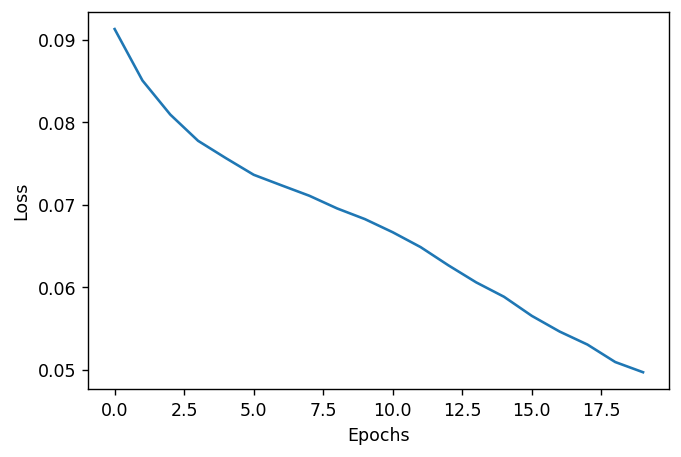

In [ ]:
# Training Loss'
NN.plot()

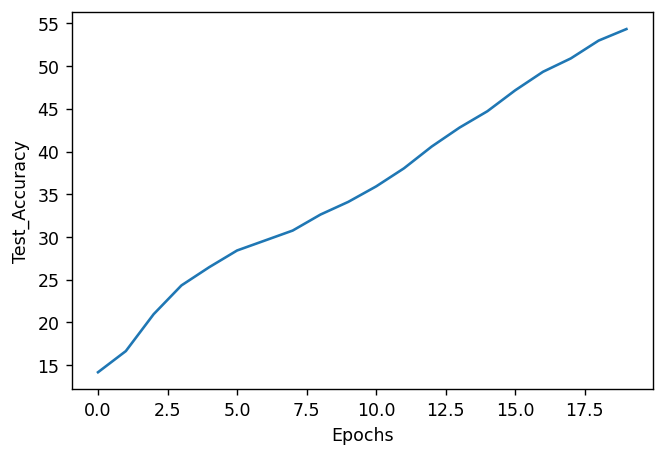

In [ ]:
# Test Accuracy

NN.acc_plot()

### Answer 2) Change in the epochs to 10

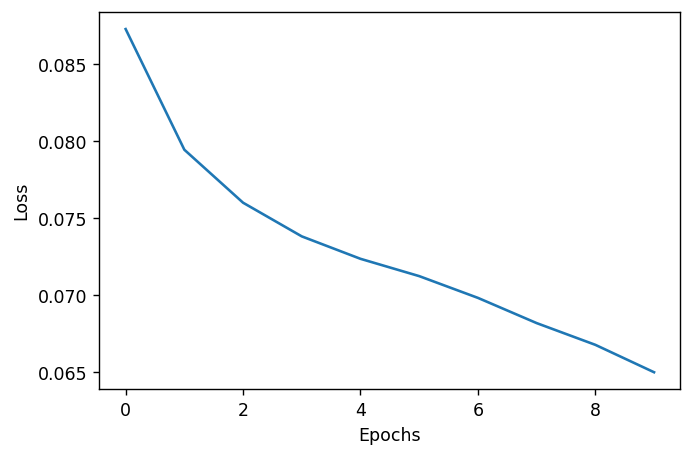

In [ ]:
# Epoch size 10
# Training Loss
NN.plot()


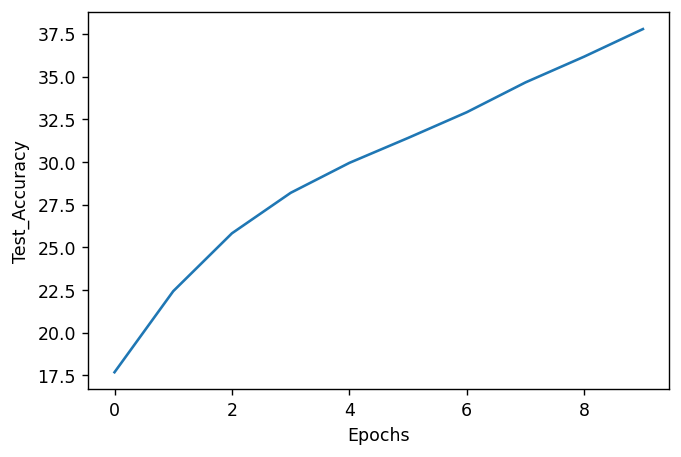

In [ ]:
# Epoch size 10
# Test Accuracy

NN.acc_plot()

### Answer 2) Change in the epochs to 5

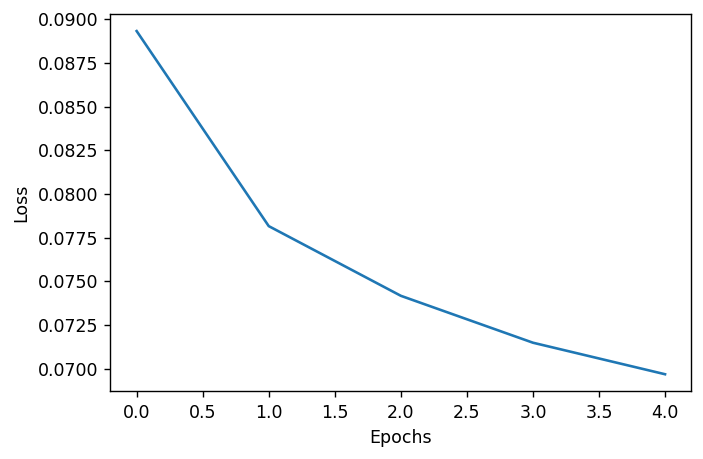

In [ ]:
# Epoch size 5
# Training Loss
NN.plot()

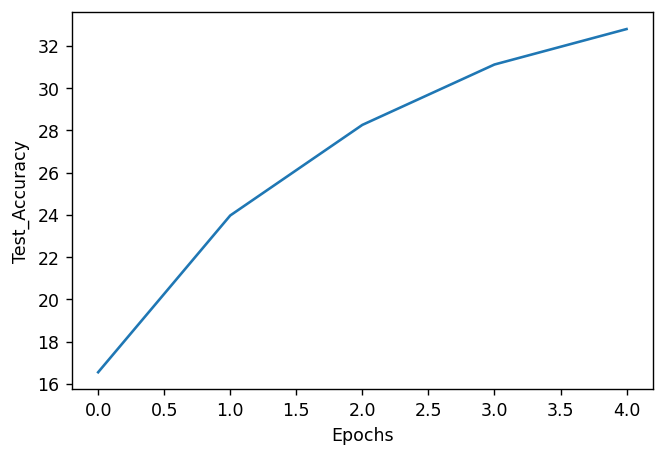

In [ ]:
# Epoch size 5
# Test Accuracy

NN.acc_plot()

# As we can see above by deacreasing the number of epocs the test accuracy also deacreases and initial loss is also high

### Answer 2) Change in the hidden layer to 100 and 10



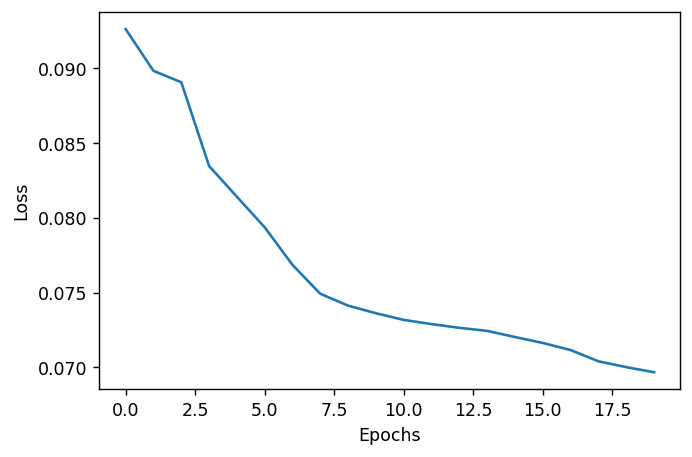

In [ ]:
# Hidden Layer changed to 100 and 10
# Training Loss
NN.plot()

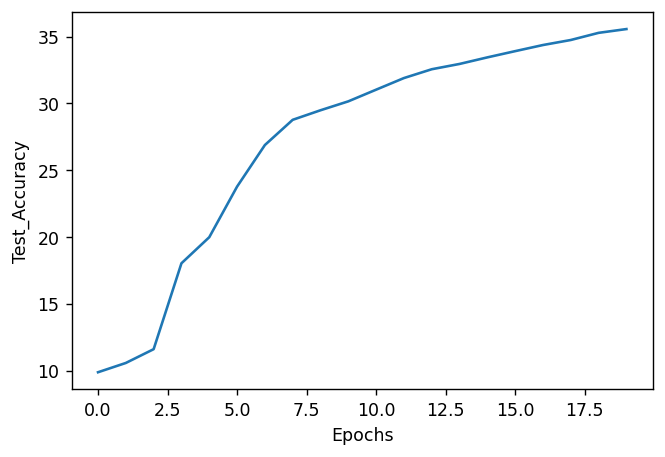

In [ ]:
# Hidden Layer changed to 100 and 10
# Test Accuracy

NN.acc_plot()

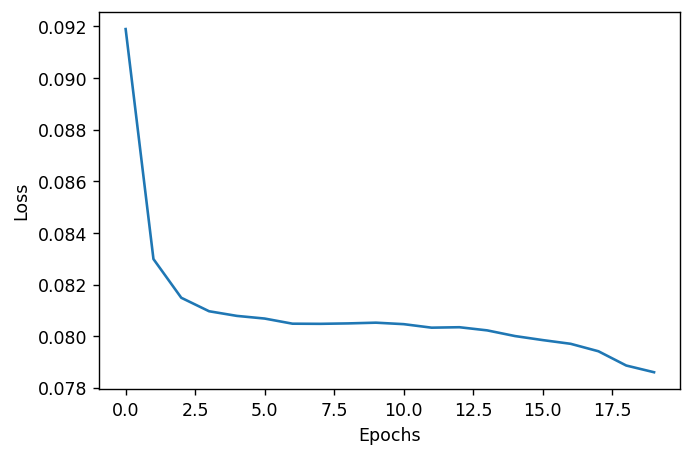

In [ ]:
# Hidden Layer changed to 50 and 5
# Training Loss
NN.plot()

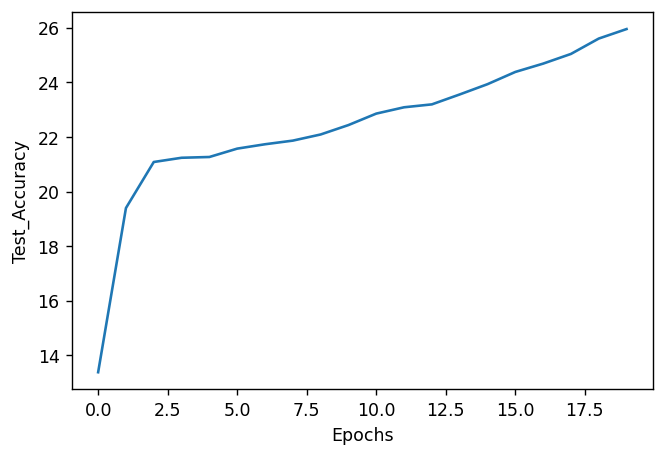

In [ ]:
# Hidden Layer changed to 50 and 5
# Test Accuracy

NN.acc_plot()

# As we can see above by deacreasing the number of hidden layer neurons the test accuracy also deacreases and initial loss is also high

# Part 2: Training an Image Classifier




##Overview
CIFAR10 dataset will be used to train an image classifier.

![](https://miro.medium.com/max/578/1*BCsHErqOJxmKDLQXYJR_ow.png)



##Data
Using `torchvision`, it’s extremely easy to load `CIFAR10`.

In [ ]:
## The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


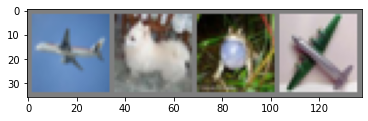

plane dog   frog  plane


In [ ]:
## Let us show some of the training images, for fun.

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

##Code (20 pts)

###Define a Convolutional Neural Network (10 pt)

Create a neural network that take 3-channel images. It should go as Conv2d --> ReLU --> MaxPool2d --> Conv2d --> ReLU --> MaxPool2d --> Flatten --> Linear --> ReLU --> Linear --> ReLU --> Linear

In [ ]:
class Net(nn.Module):
    def __init__(self):
            super(Net,self).__init__()
            self.conv1 = nn.Conv2d(3,6,5)
            self.pool = nn.MaxPool2d(2,2)
            self.conv2 = nn.Conv2d(6,16,5)
            self.fc1 = nn.Linear(16*5*5, 120)
            self.fc2 = nn.Linear(120, 84)
            self.fc3 = nn.Linear(84, 10)

      
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

###Define a Loss function and optimizer (5 pt)

Let’s use a Classification Cross-Entropy loss and SGD with momentum. (Feel free to experiment with other loss functions and optimizers to observe differences)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.003)

###Train the network (5 pts)

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [ ]:
train_losses = []
train_accuracy = []
epochs = 5 ## TODO: define number of epochs to train
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct = 0.0
    total = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # TODO: add line to zero the parameter gradients below
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        _, predicted = outputs.max(1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
       





        if i % 2000 == 1999:
                # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            loss = (running_loss/2000)
            train_losses.append(loss)
            running_loss = 0.0
            accu=100.*correct/total
            train_accuracy.append(accu)

print('Finished Training')

## Let’s quickly save our trained model:

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[1,  2000] loss: 2.303
[1,  4000] loss: 2.282
[1,  6000] loss: 2.097
[1,  8000] loss: 1.953
[1, 10000] loss: 1.835
[1, 12000] loss: 1.722
[2,  2000] loss: 1.618
[2,  4000] loss: 1.585
[2,  6000] loss: 1.525
[2,  8000] loss: 1.520
[2, 10000] loss: 1.469
[2, 12000] loss: 1.444
[3,  2000] loss: 1.401
[3,  4000] loss: 1.397
[3,  6000] loss: 1.372
[3,  8000] loss: 1.344
[3, 10000] loss: 1.346
[3, 12000] loss: 1.314
[4,  2000] loss: 1.285
[4,  4000] loss: 1.260
[4,  6000] loss: 1.258
[4,  8000] loss: 1.244
[4, 10000] loss: 1.226
[4, 12000] loss: 1.225
[5,  2000] loss: 1.189
[5,  4000] loss: 1.176
[5,  6000] loss: 1.183
[5,  8000] loss: 1.160
[5, 10000] loss: 1.142
[5, 12000] loss: 1.152
Finished Training


###Test the network on the test data
We have trained the network over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 56.9 %
Accuracy for class: car   is 75.2 %
Accuracy for class: bird  is 51.7 %
Accuracy for class: cat   is 37.5 %
Accuracy for class: deer  is 42.4 %
Accuracy for class: dog   is 49.6 %
Accuracy for class: frog  is 74.0 %
Accuracy for class: horse is 62.6 %
Accuracy for class: ship  is 70.8 %
Accuracy for class: truck is 69.3 %


## Write-up (5 pt)
(1 pt) Show plot for loss over epochs.

(1 pt) Show plot for accuracy over epochs.

(3 pt) Show confusion matrix on test data.

## Answer 1) plot for loss over epochs

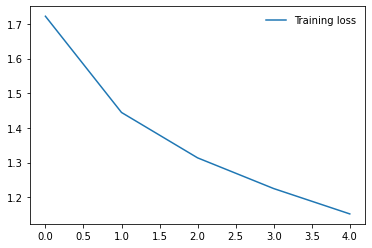

In [ ]:
n = 6
test_losses_per_epochs = train_losses[n - 1::n]
plt.plot(test_losses_per_epochs, label='Training loss')

plt.legend(frameon=False)
plt.show()

## Answer 2) plot for accuracy over epochs.

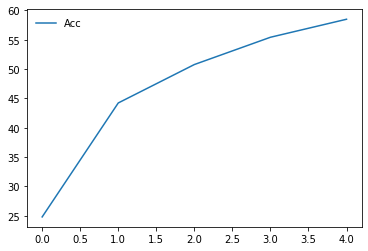

In [ ]:
n = 6
acc_per_epochs = train_accuracy[n - 1::n]
plt.plot(acc_per_epochs, label='Acc')

plt.legend(frameon=False)
plt.show()

## Answer 3) confusion matrix on test data.

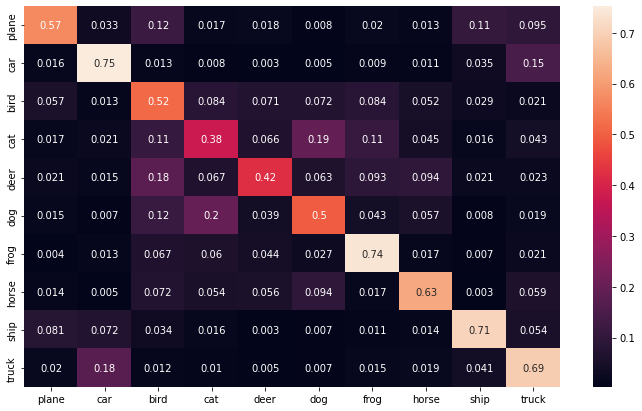

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in testloader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

## Extra Credits (5 pt)
Run VGG with pre-trained weights in this [colab](https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_vgg.ipynb#scrollTo=daily-wayne). Test any two images of your choice to your model and to VGG model and show accuracy (images must include objects from CIFAR10 classes). Discuss which model performs better and why.

# Part 3: Semantic Segmentation

## Overview
Semantic Segmentation is an image analysis task in which we classify each pixel in the image into a class.
So, let's say we have the following image.

![](https://lh3.googleusercontent.com/-ELUnFgFJqUU/XPPXOOmhfMI/AAAAAAAAAP0/2cabsTI9uGUYxM3O3w4EOxjR_iJvEQAvACK8BGAs/s374/index3.png)

And then given the above image its semantically segmentated image would be the following

![](https://lh3.googleusercontent.com/-gdUavPeOxdg/XPPXQngAnvI/AAAAAAAAAQA/yoksBterCGQGt-lv3aX4kfyMUDXTar7yACK8BGAs/s374/index4.png)

As you can see, that each pixel in the image is classified to its respective class.


## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [35]:
import os 
import tarfile
import shutil
import urllib.request

url='http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar'
path='VOC'
def get_archive(path,url):
  try:
    os.mkdir(path)
  except:
    path=path
  
  filename='devkit'
  urllib.request.urlretrieve(url,f"{path}/{filename}.tar")
 
get_archive(path,url)
def extract(path):
  tar_file=tarfile.open(f"{path}/devkit.tar")
  tar_file.extractall('./')
  tar_file.close()
  shutil.rmtree(path)

extract(path)

## Helper Functions

In [36]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models
import torchvision.transforms as T
import numpy as np

"""Various RGB palettes for coloring segmentation labels."""
VOC_CLASSES = [
    "background",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "potted plant",
    "sheep",
    "sofa",
    "train",
    "tv/monitor",
    'border'
]


VOC_COLORMAP = [
    [0, 0, 0],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
]

## Code (25 pt)

### 1. Implement Data Loader for training and validation (5 pt)

In [38]:
num_classes = 22                                        
data_root = './VOCdevkit/VOC2007'        
batch_size = 16   

In [39]:
train_path = os.path.join(data_root, 'ImageSets/Segmentation/train.txt')
val_path = os.path.join(data_root, 'ImageSets/Segmentation/val.txt')
img_dir = os.path.join(data_root, "JPEGImages")
mask_dir = os.path.join(data_root, "SegmentationClass")

In [40]:
class PascalVOCDataset(torch.utils.data.Dataset):
    """Pascal VOC2007 or compatible dataset"""
    
    def __init__(self, num_classes, list_file, img_dir, mask_dir, transform=None):
        self.num_classes = num_classes
        self.images = open(list_file, "rt").read().split("\n")[:-1]
        self.transform = transform
        self.img_extension = ".jpg"
        self.mask_extension = ".png"
        self.image_root_dir = img_dir
        self.mask_root_dir = mask_dir


    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        name = self.images[index]
        image_path = os.path.join(self.image_root_dir, name + self.img_extension)
        mask_path = os.path.join(self.mask_root_dir, name + self.mask_extension)

        image = self.load_image(path=image_path)
        gt_mask = self.load_mask(path=mask_path)

        return torch.FloatTensor(image), torch.LongTensor(gt_mask)

    def load_image(self, path=None):
        raw_image = PIL.Image.open(path)
        raw_image = np.transpose(raw_image.resize((224, 224)), (2,1,0))
        imx_t = np.array(raw_image, dtype=np.float32)/255.0
        return imx_t

    def load_mask(self, path=None):
        raw_image = PIL.Image.open(path)
        raw_image = raw_image.resize((224, 224))
        imx_t = np.array(raw_image)
        imx_t[imx_t==255] = self.num_classes-1        # convert VOC border into last class
        return imx_t

In [41]:
train_dataset = PascalVOCDataset(num_classes=num_classes, list_file=train_path,
                                 img_dir=img_dir, mask_dir=mask_dir)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                              shuffle=True, num_workers=4)

In [42]:
test_image_idx = 30  # only one image, but could be more
test_images = train_dataset[test_image_idx][0].unsqueeze(0)
test_masks = train_dataset[test_image_idx][1].unsqueeze(0)

###2. Define model and training code (15 pt)
Implement FCN-32 model. You can use encoder as pretrained model provided by torchvision.       

 Training code for the semantic segmentation model. Implment both training and validation parts.  

In [43]:
class VGGNet(VGG):
    def __init__(self, pretrained=True, model='vgg16', requires_grad=True, remove_fc=True, show_params=False):
        super().__init__(make_layers(cfg[model]))
        self.ranges = ranges[model]

        if pretrained:
            exec("self.load_state_dict(models.%s(pretrained=True).state_dict())" % model)

        if not requires_grad:
            for param in super().parameters():
                param.requires_grad = False

        if remove_fc:  # delete redundant fully-connected layer params, can save memory
            del self.classifier

        if show_params:
            for name, param in self.named_parameters():
                print(name, param.size())

    def forward(self, x):
        output = {}
        # get the output of each maxpooling layer (5 maxpool in VGG net)
        for idx in range(len(self.ranges)):
            for layer in range(self.ranges[idx][0], self.ranges[idx][1]):
                x = self.features[layer](x)
            output["x%d"%(idx+1)] = x

        return output


ranges = {
    'vgg11': ((0, 3), (3, 6),  (6, 11),  (11, 16), (16, 21)),
    'vgg13': ((0, 5), (5, 10), (10, 15), (15, 20), (20, 25)),
    'vgg16': ((0, 5), (5, 10), (10, 17), (17, 24), (24, 31)),
    'vgg19': ((0, 5), (5, 10), (10, 19), (19, 28), (28, 37))
}

# cropped version from https://github.com/pytorch/vision/blob/master/torchvision/models/vgg.py
cfg = {
    'vgg11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'vgg19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

def make_layers(cfg, batch_norm=False):
    layers = []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)

class FCN32s(nn.Module):

    def __init__(self, pretrained_net, n_class):
        super().__init__()
        self.n_class = n_class
        self.pretrained_net = pretrained_net
        self.relu    = nn.ReLU(inplace=True)
        self.deconv1 = nn.ConvTranspose2d(512, 512, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn1     = nn.BatchNorm2d(512)
        self.deconv2 = nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn2     = nn.BatchNorm2d(256)
        self.deconv3 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn3     = nn.BatchNorm2d(128)
        self.deconv4 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn4     = nn.BatchNorm2d(64)
        self.deconv5 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn5     = nn.BatchNorm2d(32)
        self.classifier = nn.Conv2d(32, n_class, kernel_size=1)

    def forward(self, x):
        output = self.pretrained_net(x)
        x5 = output['x5']  # size=(N, 512, x.H/32, x.W/32)

        score = self.bn1(self.relu(self.deconv1(x5)))     # size=(N, 512, x.H/16, x.W/16)
        score = self.bn2(self.relu(self.deconv2(score)))  # size=(N, 256, x.H/8, x.W/8)
        score = self.bn3(self.relu(self.deconv3(score)))  # size=(N, 128, x.H/4, x.W/4)
        score = self.bn4(self.relu(self.deconv4(score)))  # size=(N, 64, x.H/2, x.W/2)
        score = self.bn5(self.relu(self.deconv5(score)))  # size=(N, 32, x.H, x.W)
        score = self.classifier(score)                    # size=(N, n_class, x.H/1, x.W/1)

        return score  # size=(N, n_class, x.H/1, x.W/1)
vgg_model = VGGNet(requires_grad=True)
fcn_model = FCN32s(pretrained_net=vgg_model, n_class=2)


### 3. Inference for semantic segmentation (5 pt)

Implement the inference code for semantic segmentation. Display the visualization results of the model. Plot the image and colorized image (similar to the results in overview). 

In [44]:
def plot_test_batch(test_images, test_logits, test_masks):
    for i in range(len(test_images)):
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4,
                                                 figsize=(12, 4*len(test_images)))
        ax1.imshow(test_images[i].transpose(0, 2).numpy()); ax1.set_title('Input Image')

        predicted_mx = test_logits[i].numpy()
        predicted_mx = predicted_mx.argmax(axis=0)
        ax2.imshow(predicted_mx, vmin=0, vmax=num_classes); ax2.set_title('Predicted Mask')

        target_mx = test_masks[i].numpy()
        ax3.imshow(target_mx, vmin=0, vmax=num_classes); ax3.set_title('Ground Truth')
        
        acc_mx = predicted_mx != target_mx
        ax4.imshow(acc_mx); ax4.set_title('Prediction Errors')
        
        plt.show()

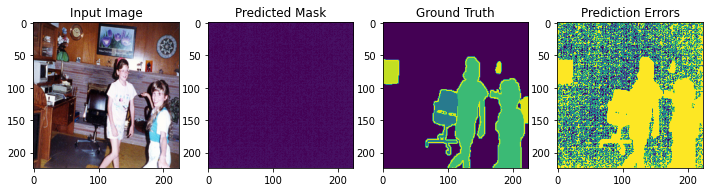

In [45]:
with torch.no_grad():
    test_logits  = fcn_model(test_images)        # pass through model
    test_logits = test_logits.cpu()
    plot_test_batch(test_images, test_logits, test_masks)

## Write-up (5 pt)
* Describe the properties of segmentation model
* Describe the evaluation metric (IoU) for segmentation model 

## Answer 1)

The properties of the segmentation model is

proximity, 
similarity, 
common fate, 
common region, 
parallelism, 
symmetry, 
continuity,
closure

## Answer 2)

* A measure of how closely a predicted mask or bounding box corresponds to the real data, used to rank the performance of Deep Learning algorithms.
 IoU = true_positives / (true_positives + false_positives + false_negatives)

## Hint
* Refer to original paper FCNet : https://arxiv.org/abs/1411.4038
* Figures for FCNet Structure: https://towardsdatascience.com/review-fcn-semantic-segmentation-eb8c9b50d2d1
* PyTorch Tutorial for Image semgnetation: https://towardsdatascience.com/train-neural-net-for-semantic-segmentation-with-pytorch-in-50-lines-of-code-830c71a6544f

# Part 4: Text2Img Generation (10 Points)

We have provided link to 'DALL.E' mini model to generate images from a text prompt in an interactive way.

https://colab.research.google.com/github/borisdayma/dalle-mini/blob/main/tools/inference/inference_pipeline.ipynb#scrollTo=118UKH5bWCGa

### Write-up (10 pts)
1. Try different prompts (as per your understanding) to reveal biases encoded by model (for example, birds always exist in the similar surroundings like trees).

2. By inputting creative text prompts, you should report the failure cases in your writeup i.e. when model doesn't quite understand the semantics of text prompt (for example, in case of long and complex sentences).

## Answer 1) Biases encoded by model 

## Highways - Highways are always shown in day light and no cars on them

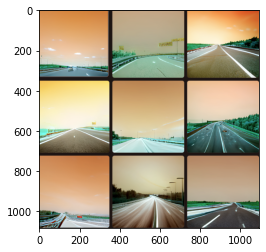

In [30]:
x = cv2.imread("/content/Screenshot_20221210_094236.png")
plt.imshow(x)

## alien - alien are always shown in green color with big eyes, big head and same body structure

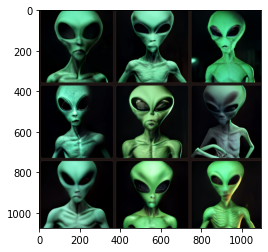

In [31]:
x = cv2.imread("/content/Screenshot_20221210_094802.png")
plt.imshow(x)

## Answer 2 Failure cases

Monkeys dancing with humans - No humans were generated by the model

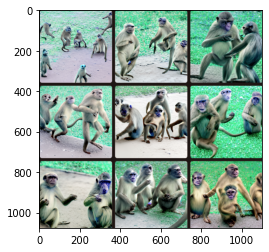

In [32]:
x = cv2.imread("/content/Screenshot_20221210_095156.png")
plt.imshow(x)

Dogs riding horse - Model only generated humans riding horses

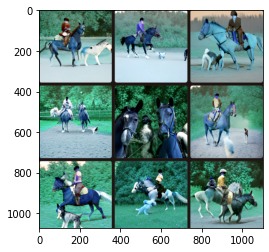

In [33]:
x = cv2.imread("/content/Screenshot_20221210_095425.png")
plt.imshow(x)

### Extra Credit (15 pts)

In this part, you would compare the results of two recent text-to-image generation models: DALL E (https://www.craiyon.com) v/s Stable Diffusion (https://huggingface.co/spaces/stabilityai/stable-diffusion). 

1. You can compare the results of two models in terms of: image quality, diversity of background, grounding in the text prompt and so on.

2. Similar to the main write-up, you are required to report 2 biases and 2 failure cases: i) where these models are unfairly biased, and ii) cases where one model is able to rectify the mistakes (of not understanding the semantics of text prompt) made by other one.



Note: You shouldn't copy/past examples from internet, and any event of exact matching for any of the text prompts would be penalized.

Answer 1) Comparision

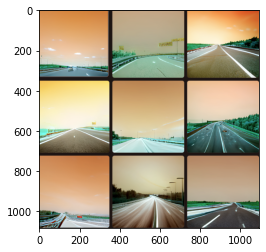

In [34]:
# Image by Craiyon
x = cv2.imread("/content/Screenshot_20221210_094236.png")
plt.imshow(x)

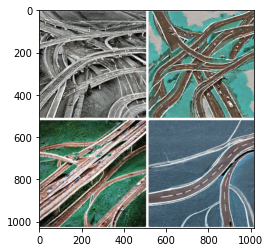

In [35]:
# Image by Stable Diffusion
x = cv2.imread("/content/Screenshot_20221210_100143.png")
plt.imshow(x)

The image provided by the craiyon was all of same time while the image by stable diffusion was much better in varity and quality and was also more complicated.

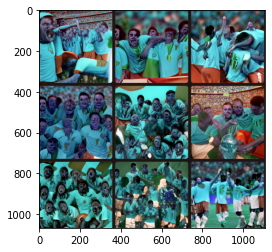

In [36]:
# Image by Craiyon
x = cv2.imread("/content/Screenshot_20221210_100555.png")
plt.imshow(x)

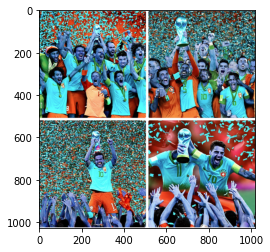

In [37]:
# Image by Stable Diffusion
x = cv2.imread("/content/Screenshot_20221210_100651.png")
plt.imshow(x)

The image provided by the craiyon of humans was kinda look like an aliens and there was no world cup in the image while the image provided by the stable diffusion was much better and had a worldcup.

## Aswer 2) Biases

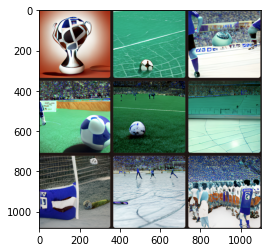

In [40]:
# Biases by Crayon

x = cv2.imread("/content/Screenshot_20221210_101517.png")
plt.imshow(x)


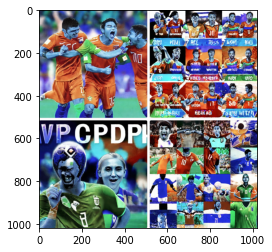

In [39]:
# Biases by Stable Diffuse

x = cv2.imread("/content/Screenshot_20221210_101449.png")
plt.imshow(x)


Both software only consider football as worldcup

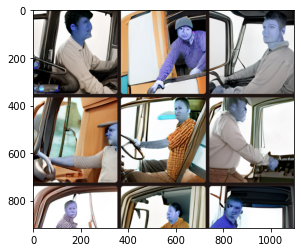

In [42]:
# Biases by Crayon

x = cv2.imread("/content/Screenshot_20221210_101939.png")
plt.imshow(x)


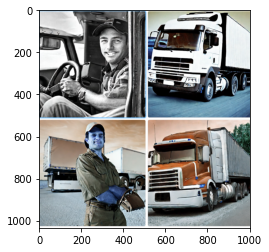

In [41]:
# Biases by Stable Diffuse

x = cv2.imread("/content/Screenshot_20221210_101919.png")
plt.imshow(x)


Both software shows truck drivers as only male.

## Answer 2) Failure Cases

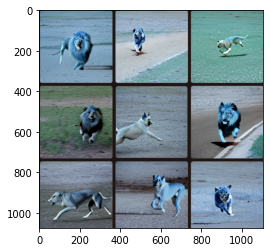

In [44]:
# failure by Crayon

x = cv2.imread("/content/Screenshot_20221210_102446.png")
plt.imshow(x)


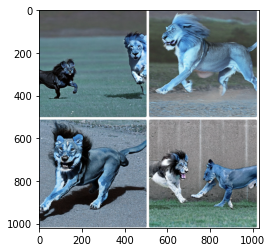

In [43]:
# failure by stable

x = cv2.imread("/content/Screenshot_20221210_102414.png")
plt.imshow(x)


In the crayon only one animal is show and in the stable diffusion case no dogs were shown

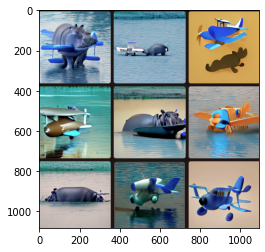

In [45]:
# failure by Crayon

x = cv2.imread("/content/Screenshot_20221210_103416.png")
plt.imshow(x)


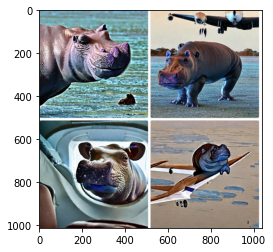

In [46]:
# failure by stable

x = cv2.imread("/content/Screenshot_20221210_103448.png")
plt.imshow(x)


In both cases hippo was not inside an airplane

## Answer 2) rectify the mistakes

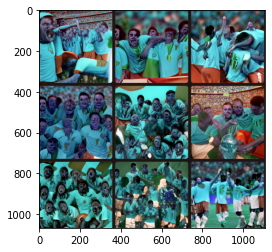

In [47]:
# Image by Craiyon
x = cv2.imread("/content/Screenshot_20221210_100555.png")
plt.imshow(x)

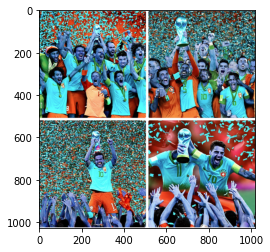

In [49]:
# Image by Craiyon
x = cv2.imread("/content/Screenshot_20221210_100555.png")
plt.imshow(x)


Crayon made a mistake that didn't showed the worlcup while stable diffusion showed the world cup

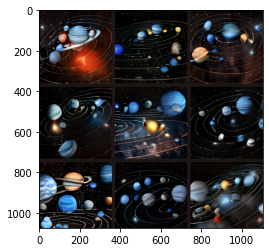

In [51]:
# Image by Craiyon
x = cv2.imread("/content/Screenshot_20221210_104055.png")
plt.imshow(x)

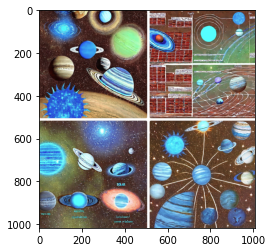

In [50]:
# Image by Craiyon
x = cv2.imread("/content/Screenshot_20221210_104119.png")
plt.imshow(x)

In the above case of solar system crayon perform better showing all the planets and orbits while stable was giving random images in random poistion of planets